<a href="https://colab.research.google.com/github/lokeshreddiee/Task_Completion/blob/main/CMPE_255_GROUP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Hazard Prediction

Importing libraries

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [161]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

Reading the data from credit risk dataset

In [162]:
credit_base = pd.read_csv('credit_risk_dataset.csv')

In [163]:
credit_base.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [164]:
credit_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Exploratory data analysis

# Univariate analysis(continuous variables)

In [165]:
measures_df = credit_base.select_dtypes(include='number')

In [166]:
measures_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [167]:
measures_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [168]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

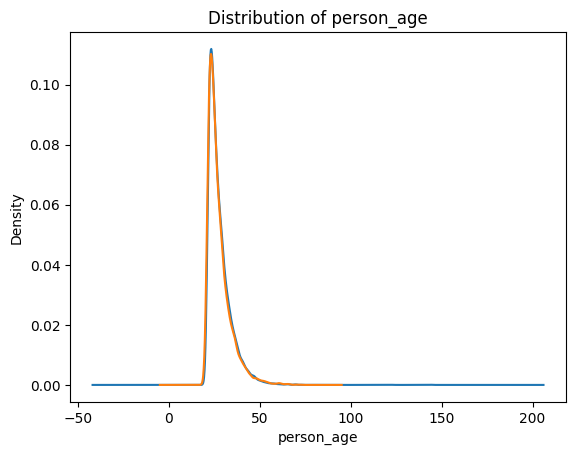

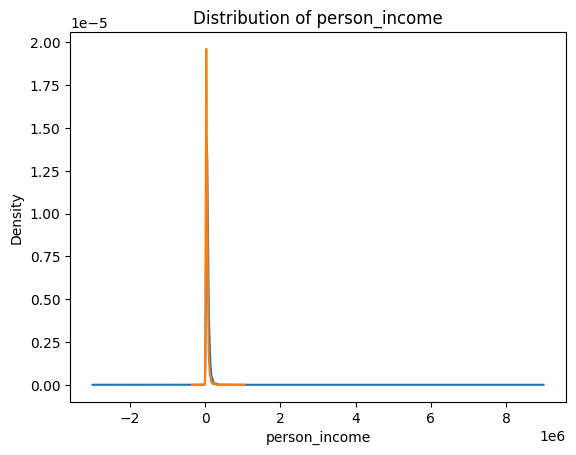

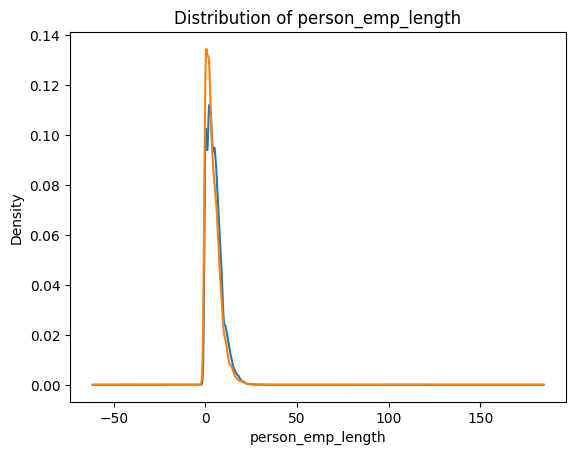

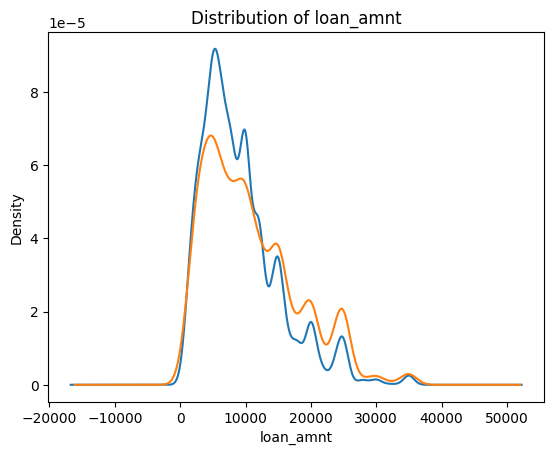

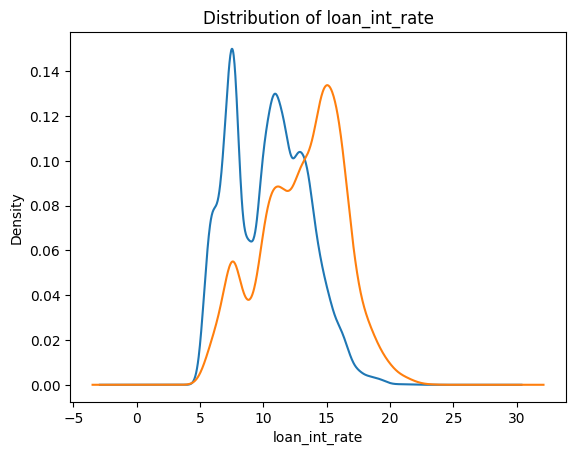

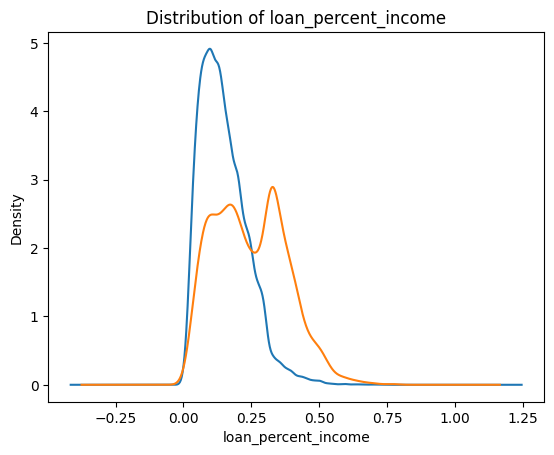

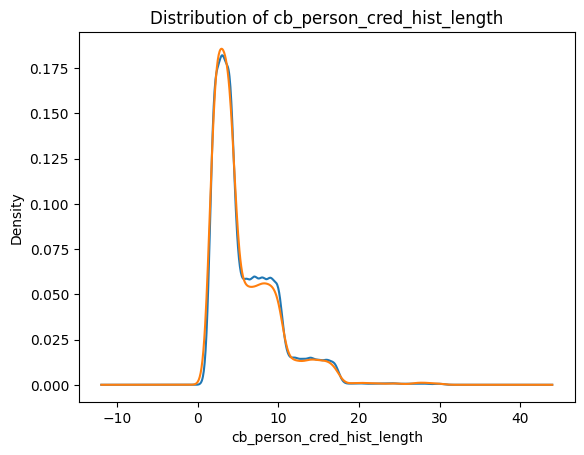

In [169]:
grpby = credit_base.groupby('loan_status')
for col in columns:
    plt.figure()
    grpby[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Bivariate analysis(Numerical variables)

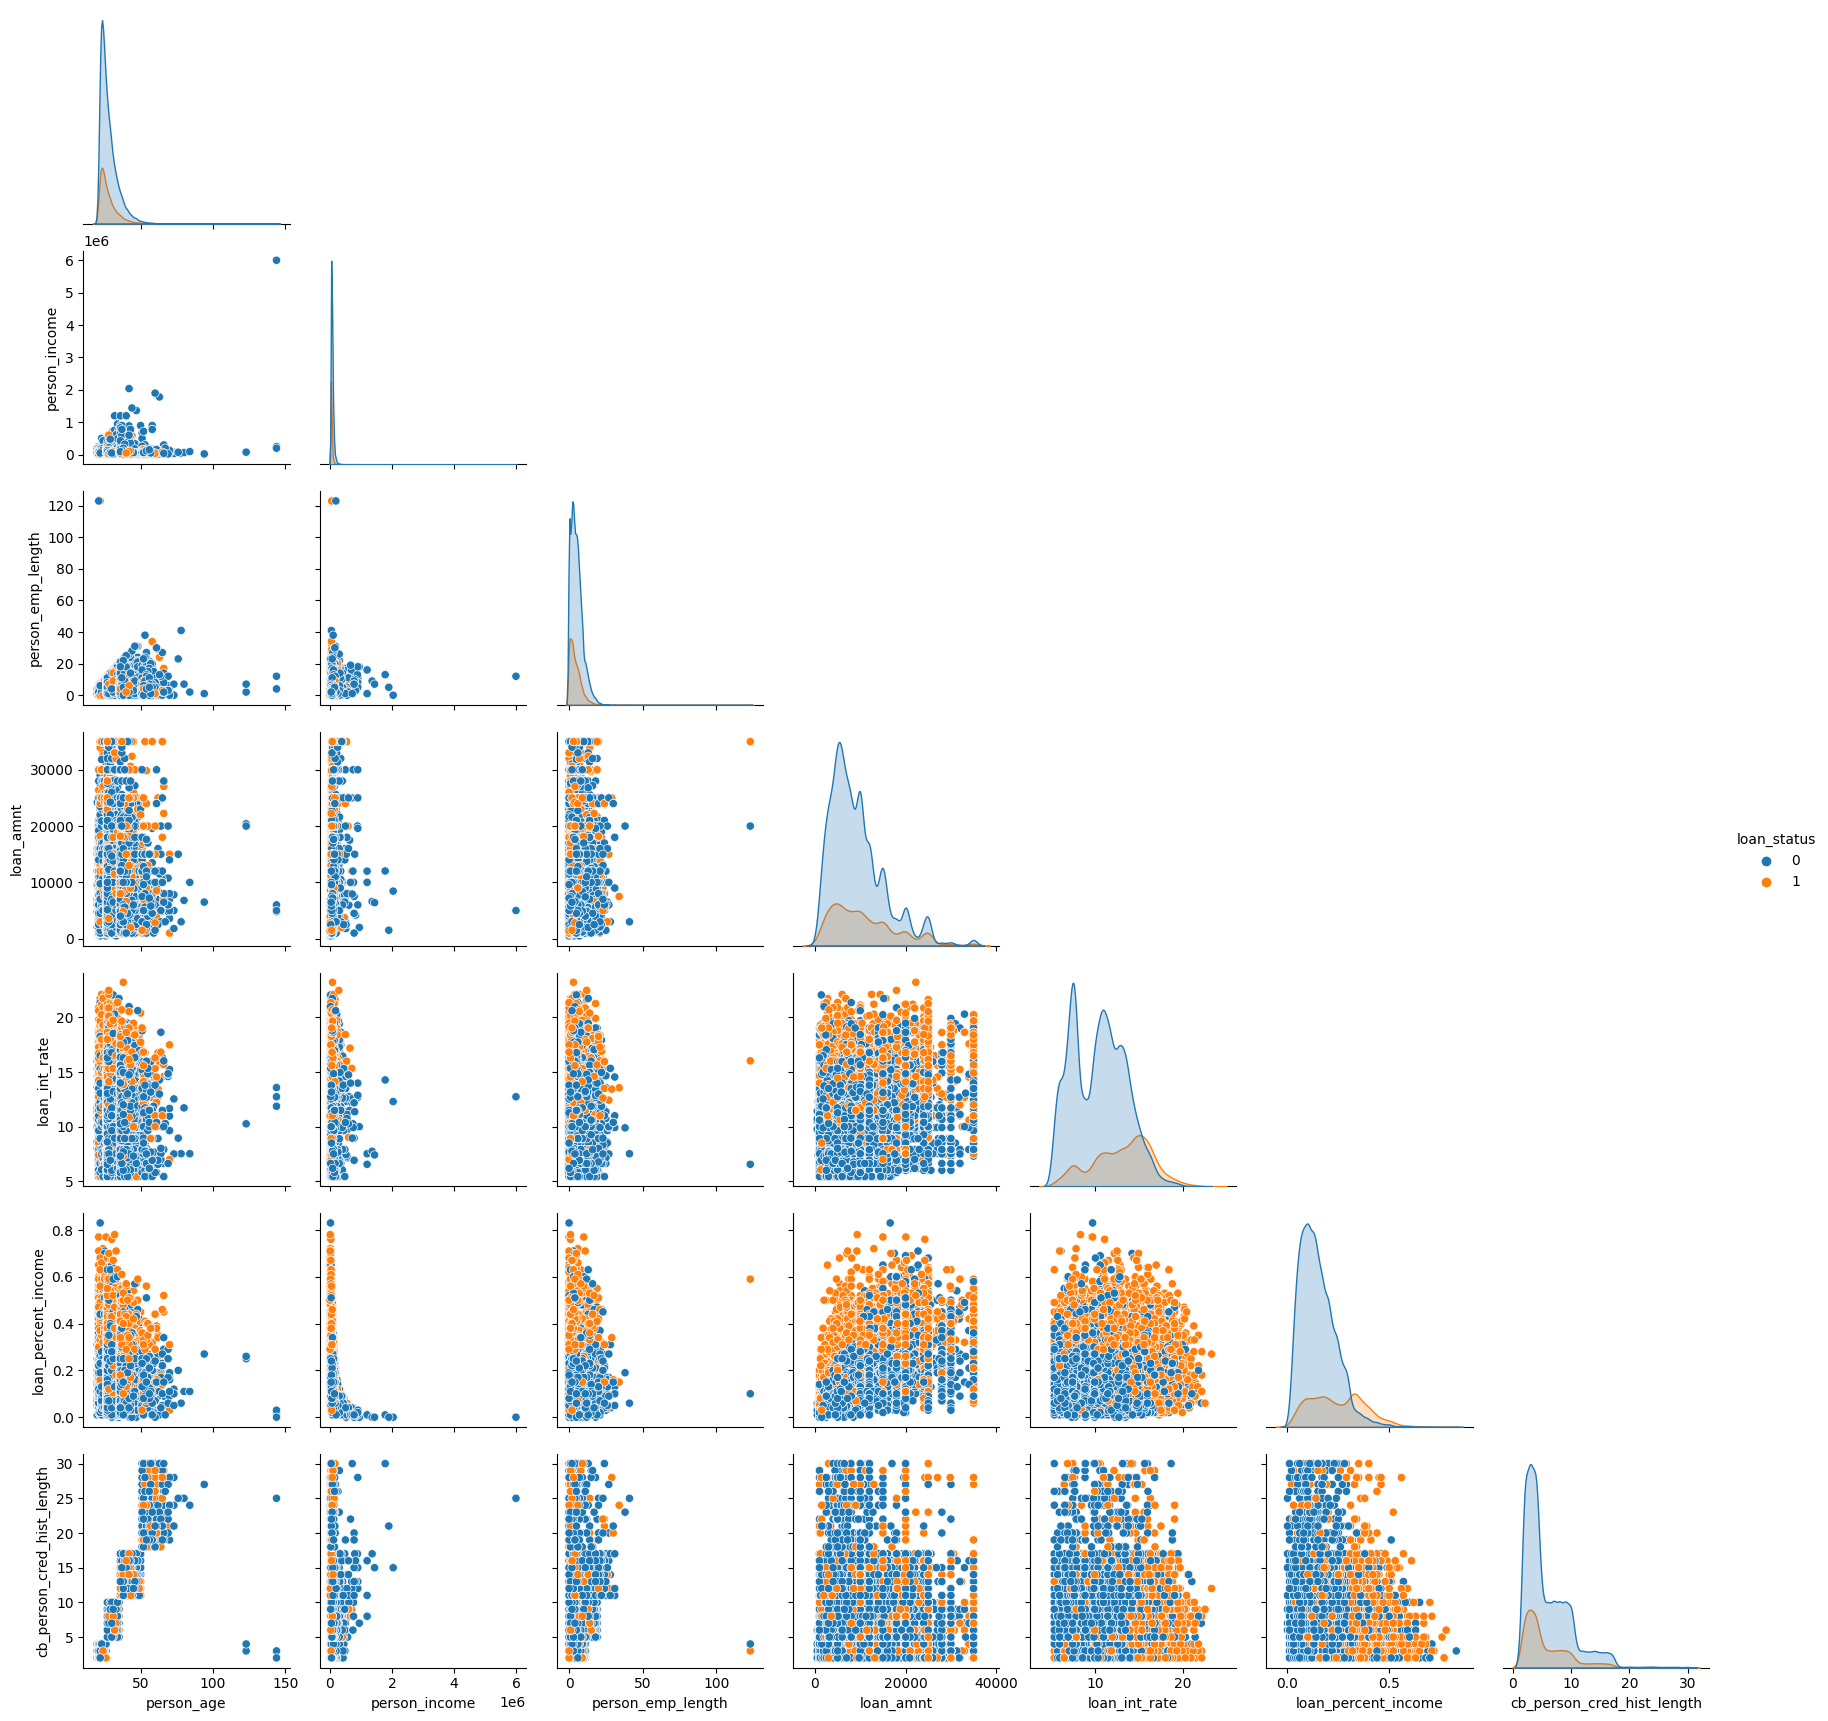

In [170]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

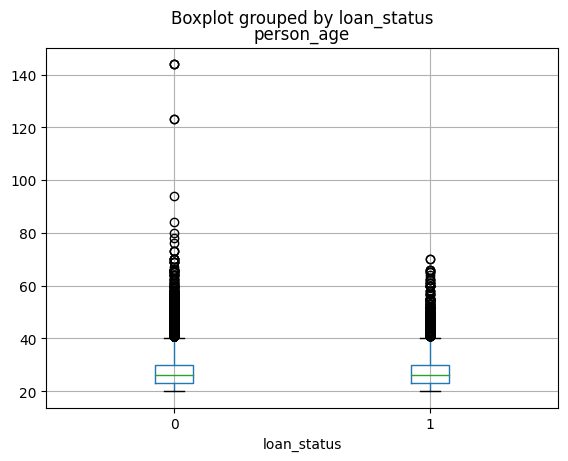

In [171]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [172]:
credit_base['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [173]:
credit_base['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [174]:
credit_base['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [175]:
credit_base['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<Axes: xlabel='person_age', ylabel='cb_person_default_on_file'>

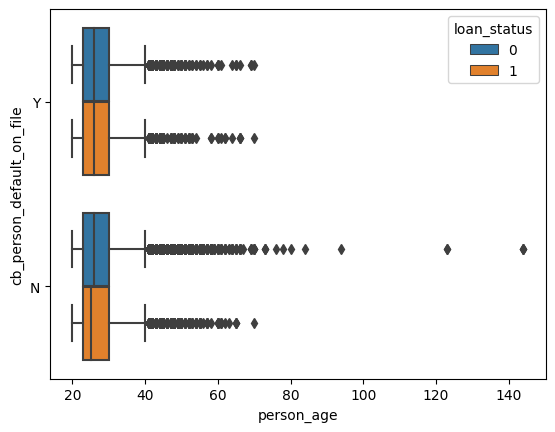

In [176]:
sns.boxplot(data=credit_base, x="person_age", y="cb_person_default_on_file", hue="loan_status")

#PREPROCESSING(Data filtering)

##dropping null valued rows

In [177]:
credit_base.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [178]:
credit_base = credit_base.dropna()

In [179]:
credit_base.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##outliers

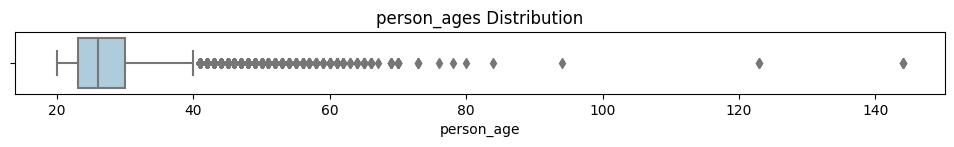

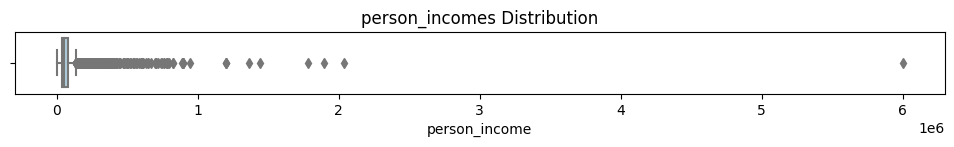

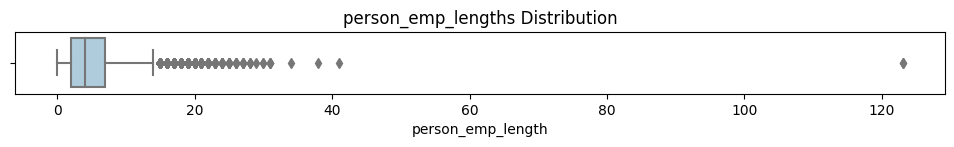

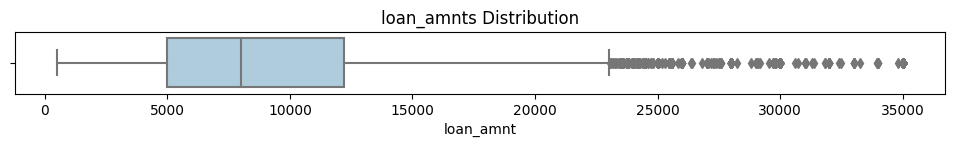

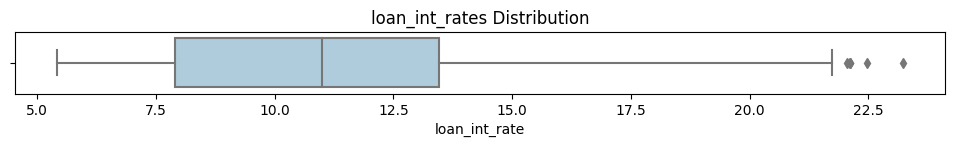

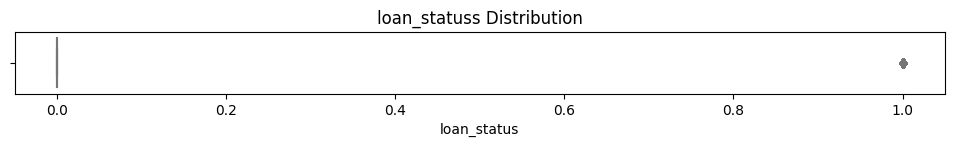

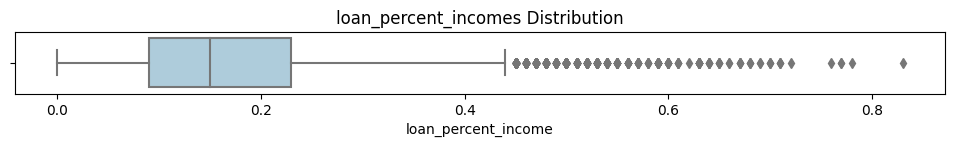

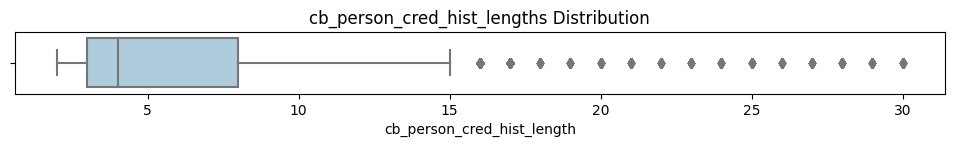

In [180]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [181]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


In [182]:
credit_base.shape

(28638, 12)

In [183]:
for col in columns:
  credit_base = credit_base[(credit_base[col] <= credit_base[col].mean() + 3*credit_base[col].std()) &
        (credit_base[col] >= credit_base[col].mean() - 3*credit_base[col].std())]

In [184]:
credit_base.shape

(26620, 12)

##encoding

In [185]:
credit_base.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [186]:
credit_base['cb_person_default_on_file'] = credit_base['cb_person_default_on_file'].astype('category')
credit_base['loan_grade'] = credit_base['loan_grade'].astype('category')
credit_base['loan_intent'] = credit_base['loan_intent'].astype('category')
credit_base['person_home_ownership'] = credit_base['person_home_ownership'].astype('category')

In [187]:
credit_base['cb_person_default_on_file_new'] = credit_base['cb_person_default_on_file'].cat.codes
credit_base['loan_grade_new'] = credit_base['loan_grade'].cat.codes
credit_base['loan_intent_new'] = credit_base['loan_intent'].cat.codes
credit_base['person_home_ownership_new'] = credit_base['person_home_ownership'].cat.codes

In [188]:
credit_base['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [189]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(credit_base[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(credit_base.index))

In [190]:
np.array(credit_base.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [191]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [192]:
New_df=credit_base.join(enc_data)

In [193]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [194]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [195]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [196]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Target value stripping

In [197]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [198]:
features.shape

(26620, 30)

In [199]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [200]:
del New_df

# train test split

In [201]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# standarising data

In [202]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

# feature extraction

In [203]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [204]:
extracted_features

Index([                'person_age',              'person_income',
                'person_emp_length',                  'loan_amnt',
                    'loan_int_rate',        'loan_percent_income',
       'cb_person_cred_hist_length',             'loan_grade_new',
                  'loan_intent_new',  'person_home_ownership_new',
                                  1,                            4,
                                  5,                            9,
                                 10,                           11,
                                 12,                           15,
                                 17,                           18],
      dtype='object')

In [205]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True])

In [206]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

# class imbalance

In [207]:
credit_base['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

# upsampling

In [208]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [209]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


# downsampling

In [210]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [211]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))

Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17413, 30)
After UnderSampling, the shape of train_y: (17413,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12925
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [212]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)

In [213]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


#Principal Component Analysis

#no resampling

In [214]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [215]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [216]:
X_train_pca.shape

(21296, 19)

In [217]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197 0.99554266 0.99814181 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [218]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197]


In [219]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [220]:
X_train_upsampled_pca.shape

(33616, 18)

In [221]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

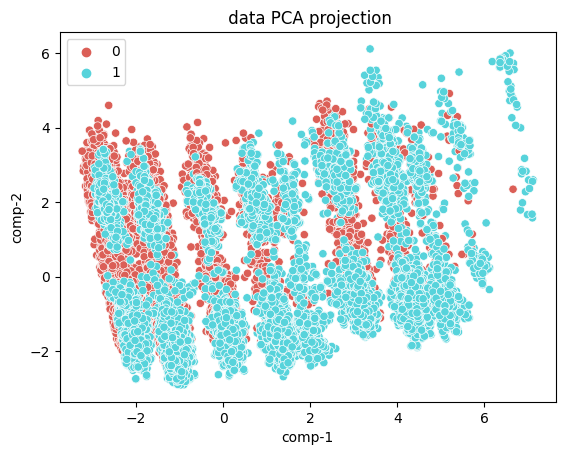

In [222]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

#downsample

In [223]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [224]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [225]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [226]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

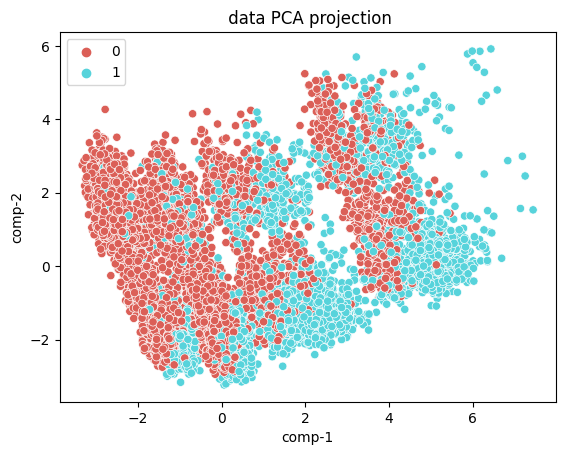

In [227]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

#Models

In [228]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [229]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [230]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve ')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [231]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [232]:
resultDic={}

#Logistic Regression Model with GridsearchCV

In [233]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [234]:
LRresult={}

##Logistic Regression without resampling

In [235]:
grid_result = LR(x_train, y_train)

In [236]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [237]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [238]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


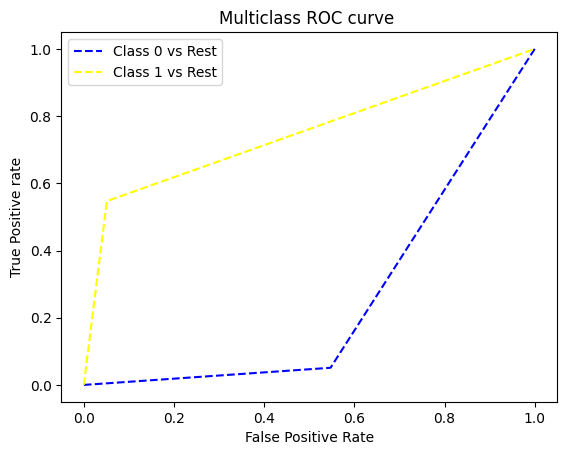

In [239]:
roc(y_test, y_prediction)

##Logistic Regression without resampling and pca

In [240]:
grid_result = LR(x_train_pca, y_train)

In [241]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [242]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of the Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [243]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


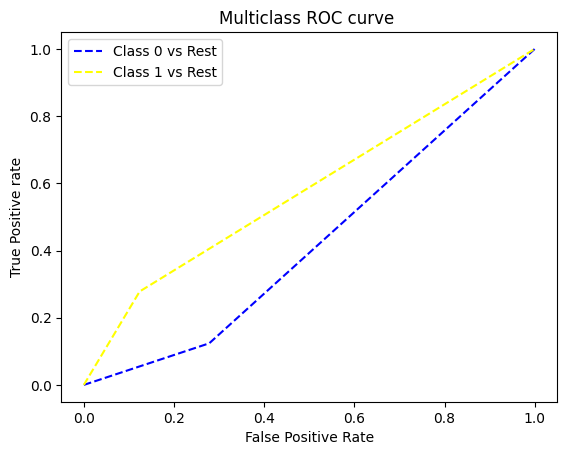

In [244]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling

In [245]:
grid_result = LR(x_train_dres, y_train_dres)

In [246]:
results(grid_result)

Best: 0.880941 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.002720) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880536 (0.002674) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.880468 (0.003108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.880941 (0.003113) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.003576) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.878981 (0.003391) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [247]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',LRresult['LR3'])

Analysis of the Algorithm:

[[3603  628]
 [ 293  800]]
[[3603  628]
 [ 293  800]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4231
           1       0.56      0.73      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8270097670924117
Precision: 0.8499495006519464
Recall: 0.8270097670924117
F1 Score: 0.8349381822430395
testing recall Score: 0.7319304666056725


In [248]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7355169340463458


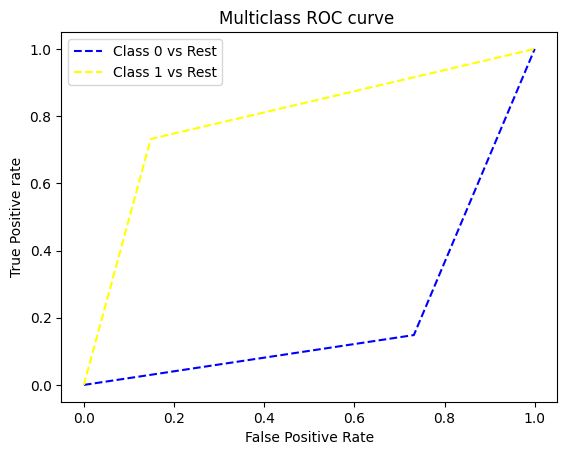

In [249]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling and pca

In [250]:
grid_result = LR(x_train_downsampled_pca, y_train_dres)

In [251]:
results(grid_result)

Best: 0.880198 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880198 (0.003475) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003395) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.879860 (0.003320) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.879724 (0.002797) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.002598) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.875262 (0.003002) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [252]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',LRresult['LR4'])

Analysis of the Algorithm:

[[3587  644]
 [ 285  808]]
[[3587  644]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4231
           1       0.56      0.74      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8255071374906086
Precision: 0.8504510831713763
Recall: 0.8255071374906086
F1 Score: 0.8339487815640269
testing class 1 recall Score: 0.7392497712717292


In [253]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7375222816399287


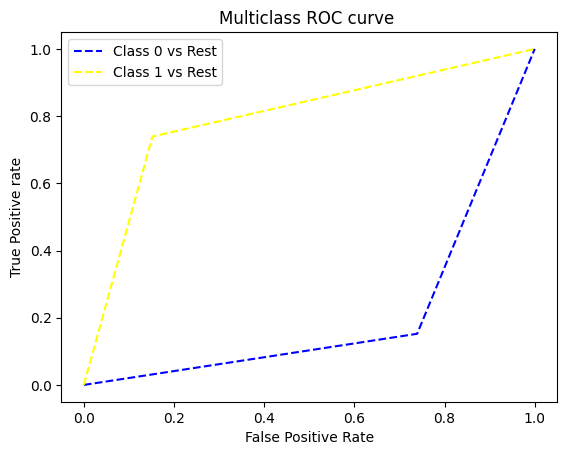

In [254]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling

In [255]:
grid_result = LR(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [256]:
results(grid_result)

Best: 0.803546 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002465) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.802475 (0.002497) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.802534 (0.002503) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002495) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002429) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.803546 (0.002678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802713 (0.002042) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [257]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR5'])

Analysis of the Algorithm:

[[3441  790]
 [ 256  837]]
[[3441  790]
 [ 256  837]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4231
           1       0.51      0.77      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.72      0.79      0.74      5324
weighted avg       0.85      0.80      0.82      5324

Accuracy: 0.8035311795642374
Precision: 0.845287382224053
Recall: 0.8035311795642374
F1 Score: 0.8162002085314433
Class 1 recall score for test data: 0.7657822506861848


In [258]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7851618277010948


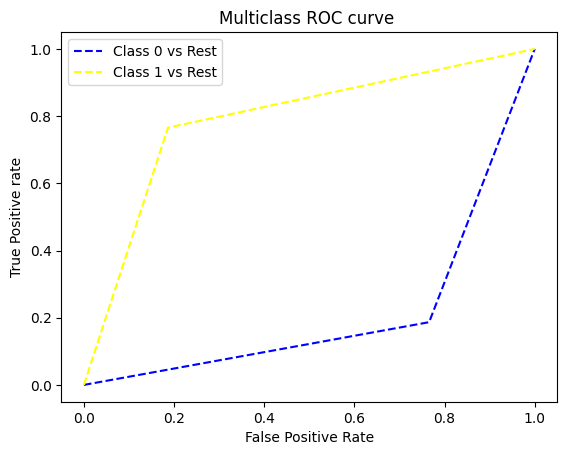

In [259]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling and pca

In [260]:
grid_result = LR(X_train_upsampled_pca, y_train_ures_SMOTE)

In [261]:
results(grid_result)

Best: 0.788702 using {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.787928 (0.004138) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.787839 (0.004132) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.787988 (0.004184) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.788018 (0.003949) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.788702 (0.004333) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [262]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR6'])

Analysis of the Algorithm:

[[3363  868]
 [ 253  840]]
[[3363  868]
 [ 253  840]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4231
           1       0.49      0.77      0.60      1093

    accuracy                           0.79      5324
   macro avg       0.71      0.78      0.73      5324
weighted avg       0.84      0.79      0.80      5324

Accuracy: 0.7894440270473329
Precision: 0.840066001671411
Recall: 0.7894440270473329
F1 Score: 0.8043082828519552
Class 1 recall score for test data: 0.7685269899359561


In [263]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7793907663017611


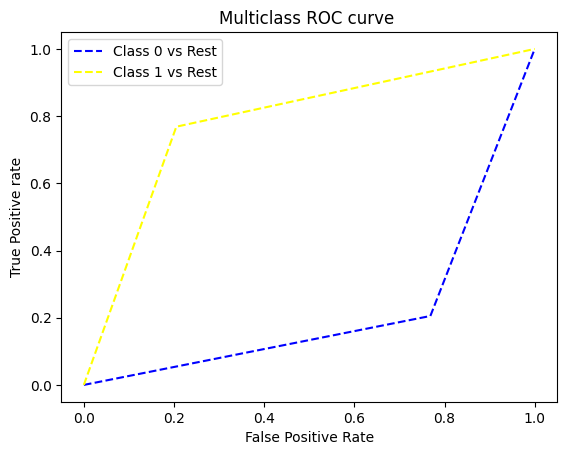

In [264]:
roc(y_test, y_prediction)

##Logistic Regression with select features

In [265]:
grid_result = LR(featureSelectedTrain, y_train)

In [266]:
results(grid_result)

Best: 0.868473 using {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868332 (0.001533) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868191 (0.001930) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868097 (0.001671) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868238 (0.001362) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.865843 (0.002112) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002111) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [267]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
LRresult['LR7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR7'])

Analysis of the Algorithm:

[[4016  215]
 [ 500  593]]
[[4016  215]
 [ 500  593]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.54      0.62      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8657024793388429
Precision: 0.8573852511167052
Recall: 0.8657024793388429
F1 Score: 0.8578233448999882
testing recall Score for class1: 0.5425434583714547


In [268]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5499108734402852


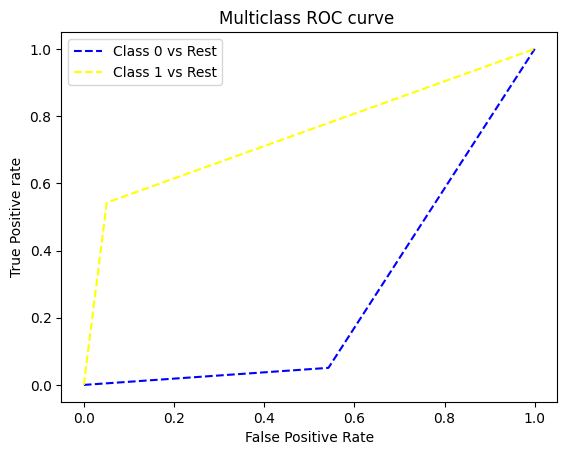

In [269]:
roc(y_test, y_prediction)

##Logistic Regression comparision

In [270]:
LRresult

{'LR1': 0.5471180237877402,
 'LR2': 0.27813357731015553,
 'LR3': 0.7319304666056725,
 'LR4': 0.7392497712717292,
 'LR5': 0.7657822506861848,
 'LR6': 0.7685269899359561,
 'LR7': 0.5425434583714547}

Logistic Regression with neighborhood cleaning rule undersampling and PCA gave better Recall score for Class 1 

In [271]:
resultDic['LogisticRegression']=0.7685269899359561#LR6

#Decision Tree with gridsearchCV

In [272]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="entropy")
  max_depth = [3, 4, 5, 6, 7, 8, 9]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [273]:
DTresult={}

##Decision Tree without resampling

In [274]:
grid_result = DT(x_train, y_train)

In [275]:
results(grid_result)

Best: 0.927357 using {'max_depth': 9, 'min_samples_split': 4}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 4}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 20}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 4}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 10}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 20}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 4}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 10}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 20}
0.923976 (0.005482) with: {'max_depth': 6, 'min_samples_split': 4}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 10}
0.923788 (0.005602) with: {'max_depth': 6, 'min_samples_split': 20}
0.924774 (0.004521) with: {'max_depth': 7, 'min_samples_split': 4}
0.924774 (0.004577) with: {'max_depth': 7, 'min_samples_spl

In [276]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT1'])

Analysis of the Algorithm:

[[4203   28]
 [ 326  767]]
[[4203   28]
 [ 326  767]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4231
           1       0.96      0.70      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.9335086401202104
Precision: 0.9355662307053066
Recall: 0.9335086401202104
F1 Score: 0.9293921361526506
testing recall Score for class1: 0.7017383348581885


In [277]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.7054367201426025


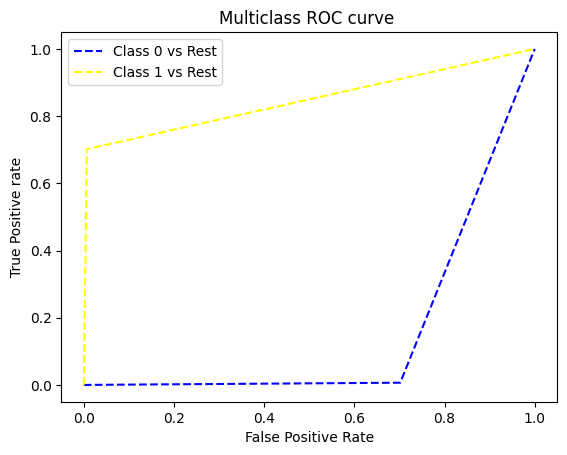

In [278]:
roc(y_test, y_prediction)

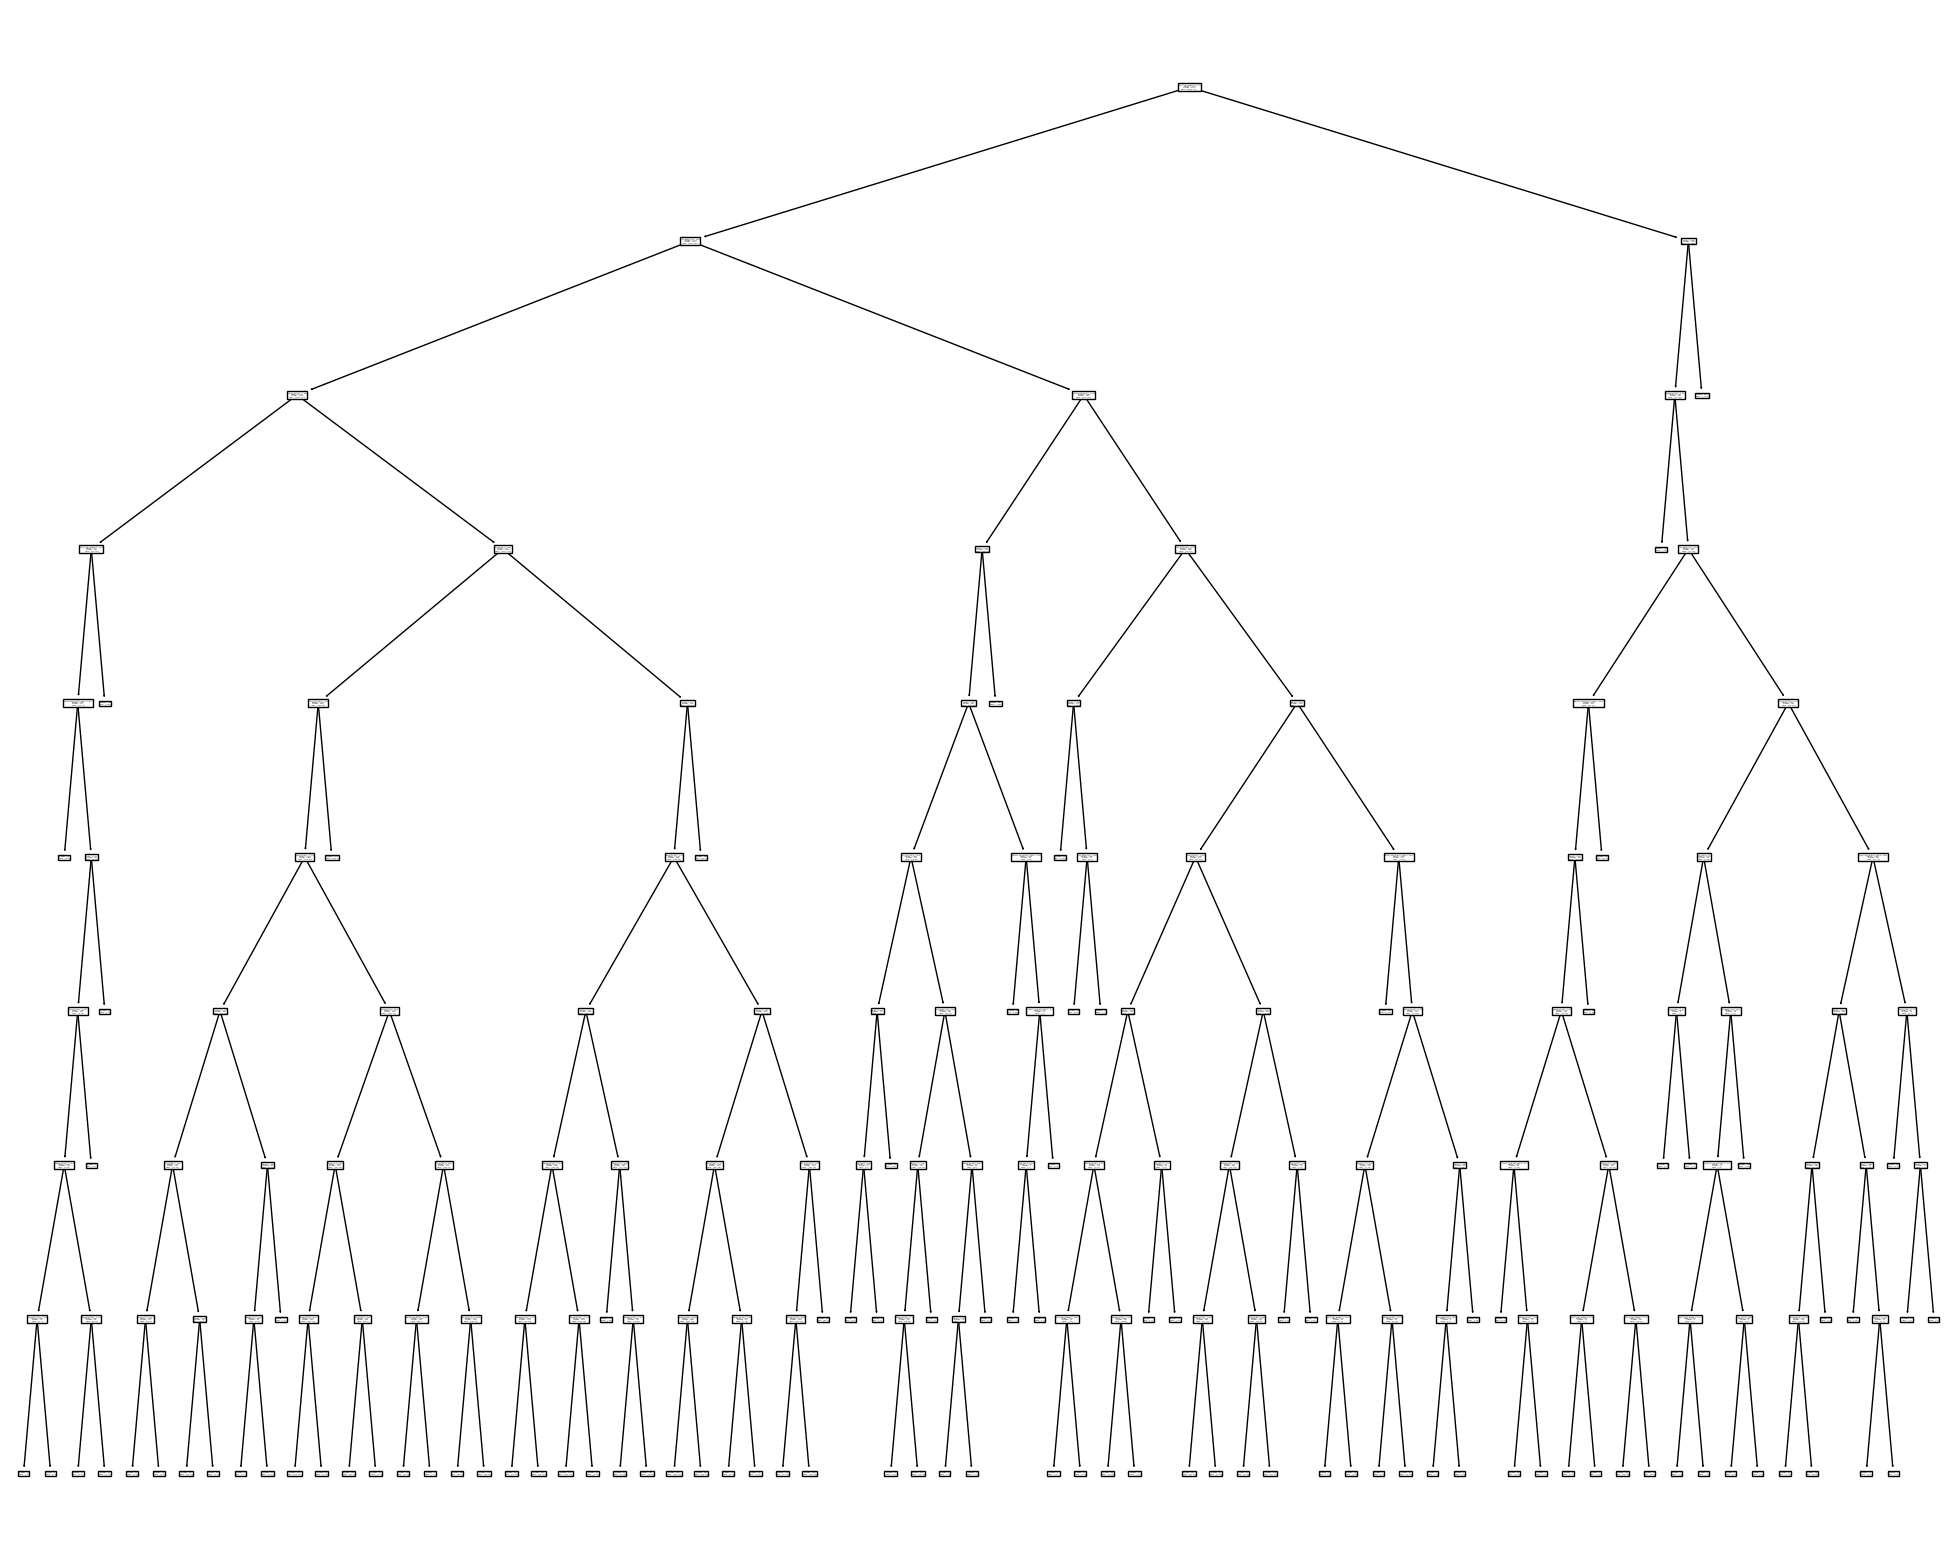

In [279]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
fig = plot_tree(grid_result.best_estimator_, feature_names=features.keys())

##Decision Tree without resampling and pca

In [280]:
grid_result = DT(x_train_pca, y_train)

In [281]:
results(grid_result)

Best: 0.894675 using {'max_depth': 9, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 10}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 20}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 4}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 10}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 20}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 4}
0.876221 (0.005837) with: {'max_depth': 5, 'min_samples_split': 10}
0.876080 (0.005959) with: {'max_depth': 5, 'min_samples_split': 20}
0.885236 (0.007929) with: {'max_depth': 6, 'min_samples_split': 4}
0.885189 (0.007567) with: {'max_depth': 6, 'min_samples_split': 10}
0.885330 (0.007312) with: {'max_depth': 6, 'min_samples_split': 20}
0.888148 (0.006157) with: {'max_depth': 7, 'min_samples_split': 4}
0.887960 (0.005610) with: {'max_depth': 7, 'min_samples_spl

In [282]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", DTresult['DT2'])

Analysis of the Algorithm:

[[3832  399]
 [ 924  169]]
[[3832  399]
 [ 924  169]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85      4231
           1       0.30      0.15      0.20      1093

    accuracy                           0.75      5324
   macro avg       0.55      0.53      0.53      5324
weighted avg       0.70      0.75      0.72      5324

Accuracy: 0.7515026296018031
Precision: 0.7013905827924143
Recall: 0.7515026296018031
F1 Score: 0.7194890936555727
Class 1 recall score on test data: 0.1546203110704483


In [283]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.6483957219251337


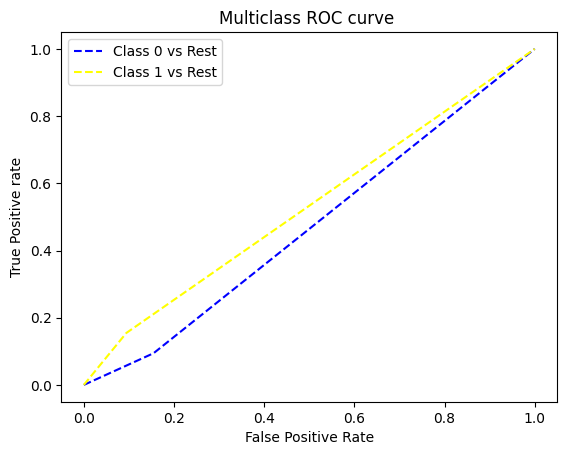

In [284]:
roc(y_test, y_prediction)

##Decision Tree with undersampling

In [285]:
grid_result = DT(x_train_dres, y_train_dres)

In [286]:
results(grid_result)

Best: 0.915151 using {'max_depth': 9, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 10}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 20}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 4}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 10}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 20}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 4}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 10}
0.901359 (0.004969) with: {'max_depth': 5, 'min_samples_split': 20}
0.905550 (0.004895) with: {'max_depth': 6, 'min_samples_split': 4}
0.905483 (0.005001) with: {'max_depth': 6, 'min_samples_split': 10}
0.905280 (0.005041) with: {'max_depth': 6, 'min_samples_split': 20}
0.912514 (0.005373) with: {'max_depth': 7, 'min_samples_split': 4}
0.912379 (0.005378) with: {'max_depth': 7, 'min_samples_spl

In [287]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',DTresult['DT3'])

Analysis of the Algorithm:

[[3933  298]
 [ 274  819]]
[[3933  298]
 [ 274  819]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.73      0.75      0.74      1093

    accuracy                           0.89      5324
   macro avg       0.83      0.84      0.84      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8925619834710744
Precision: 0.8934710284959801
Recall: 0.8925619834710744
F1 Score: 0.8929925656361832
testing recall Score: 0.7493138151875571


In [288]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7729500891265597


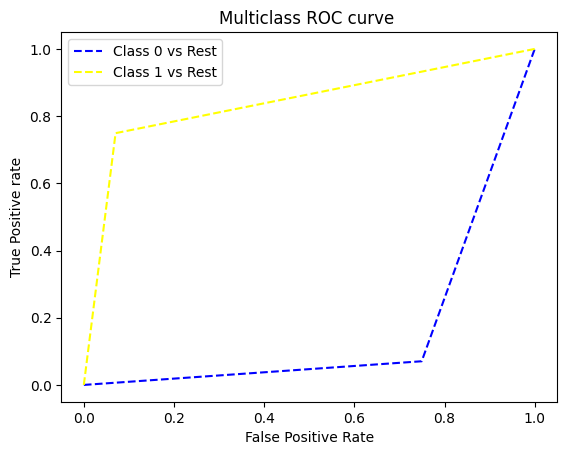

In [289]:
roc(y_test, y_prediction)

##Decision Tree with undersampling and pca

In [290]:
grid_result = DT(x_train_downsampled_pca, y_train_dres)

In [291]:
results(grid_result)

Best: 0.883781 using {'max_depth': 8, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 10}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 20}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 4}
0.861943 (0.003829) with: {'max_depth': 4, 'min_samples_split': 10}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 20}
0.867013 (0.005130) with: {'max_depth': 5, 'min_samples_split': 4}
0.867216 (0.005190) with: {'max_depth': 5, 'min_samples_split': 10}
0.867081 (0.005101) with: {'max_depth': 5, 'min_samples_split': 20}
0.871408 (0.003481) with: {'max_depth': 6, 'min_samples_split': 4}
0.871138 (0.003330) with: {'max_depth': 6, 'min_samples_split': 10}
0.870732 (0.003798) with: {'max_depth': 6, 'min_samples_split': 20}
0.878575 (0.005481) with: {'max_depth': 7, 'min_samples_split': 4}
0.878643 (0.005655) with: {'max_depth': 7, 'min_samples_spl

In [292]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',DTresult['DT4'])

Analysis of the Algorithm:

[[3824  407]
 [ 330  763]]
[[3824  407]
 [ 330  763]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.65      0.70      0.67      1093

    accuracy                           0.86      5324
   macro avg       0.79      0.80      0.79      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8615702479338843
Precision: 0.8654523806195799
Recall: 0.8615702479338843
F1 Score: 0.8632897229698049
testing class 1 recall Score: 0.6980786825251601


In [293]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.73150623885918


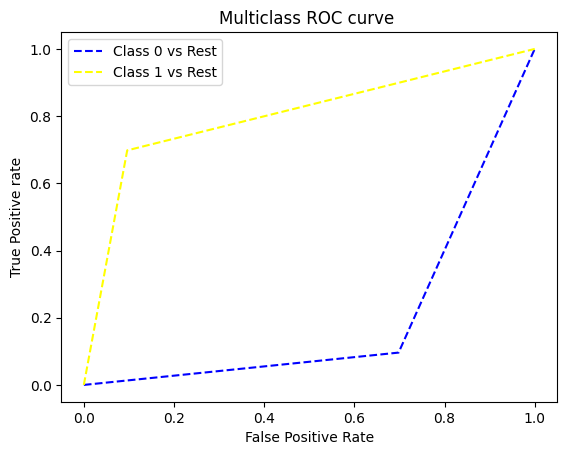

In [294]:
roc(y_test, y_prediction)

##Decision Tree with upsampling

In [295]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [296]:
grid_result = DT(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [297]:
results(grid_result)

Best: 0.872442 using {'max_depth': 11, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 10}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 20}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 4}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 10}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 20}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 4}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 10}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 20}
0.847216 (0.005625) with: {'max_depth': 6, 'min_samples_split': 4}
0.847186 (0.005614) with: {'max_depth': 6, 'min_samples_split': 10}
0.847246 (0.005481) with: {'max_depth': 6, 'min_samples_split': 20}
0.853760 (0.004009) with: {'max_depth': 7, 'min_samples_split': 4}
0.853879 (0.003994) with: {'max_depth': 7, 'min_samples_sp

In [298]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT5'])

Analysis of the Algorithm:

[[4080  151]
 [ 285  808]]
[[4080  151]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4231
           1       0.84      0.74      0.79      1093

    accuracy                           0.92      5324
   macro avg       0.89      0.85      0.87      5324
weighted avg       0.92      0.92      0.92      5324

Accuracy: 0.918106686701728
Precision: 0.9157870171621058
Recall: 0.918106686701728
F1 Score: 0.9160710851532382
Class 1 recall score for test data: 0.7392497712717292


In [299]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8014635887672537


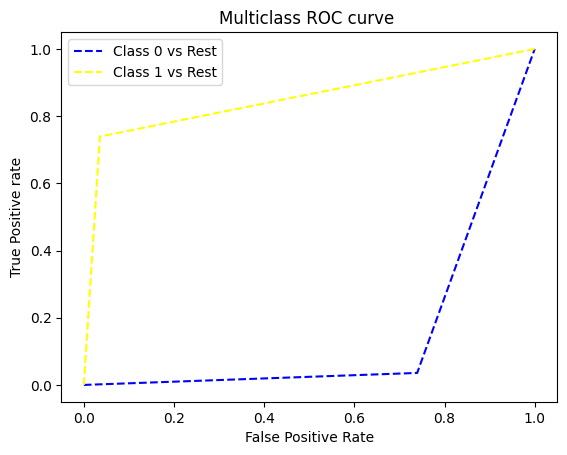

In [300]:
roc(y_test, y_prediction)

##Decision Tree with upsampling and pca

In [301]:
grid_result = DT(X_train_upsampled_pca, y_train_ures_SMOTE)

In [302]:
results(grid_result)

Best: 0.840076 using {'max_depth': 11, 'min_samples_split': 10}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 10}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 20}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 4}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 10}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 20}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 4}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 10}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 20}
0.805212 (0.004054) with: {'max_depth': 6, 'min_samples_split': 4}
0.805123 (0.004041) with: {'max_depth': 6, 'min_samples_split': 10}
0.805063 (0.004204) with: {'max_depth': 6, 'min_samples_split': 20}
0.813482 (0.002900) with: {'max_depth': 7, 'min_samples_split': 4}
0.813571 (0.002791) with: {'max_depth': 7, 'min_samples_s

In [303]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT6'])

Analysis of the Algorithm:

[[3893  338]
 [ 349  744]]
[[3893  338]
 [ 349  744]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4231
           1       0.69      0.68      0.68      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.870961682945154
Precision: 0.87048624501079
Recall: 0.870961682945154
F1 Score: 0.8707191406022983
Class 1 recall score for test data: 0.6806953339432754


In [304]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8053307948595907


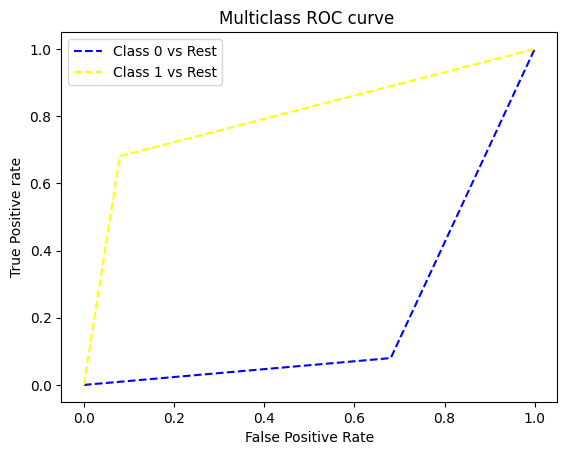

In [305]:
roc(y_test, y_prediction)

##Decision Tree with selected Features

In [306]:
grid_result = DT(featureSelectedTrain, y_train)

In [307]:
results(grid_result)

Best: 0.928484 using {'max_depth': 8, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 4}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 10}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926653 (0.005850) with: {'max_depth': 7, 'min_samples_split': 4}
0.926559 (0.005821) with: {'max_depth': 7, 'min_samples_spl

In [308]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
DTresult['DT7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT7'])

Analysis of the Algorithm:

[[4213   18]
 [ 328  765]]
[[4213   18]
 [ 328  765]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.82      1093

    accuracy                           0.94      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.94      0.93      5324

Accuracy: 0.9350112697220135
Precision: 0.9378784949157081
Recall: 0.9350112697220135
F1 Score: 0.930790073449885
testing recall Score for class1: 0.6999085086916743


In [309]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.696301247771836


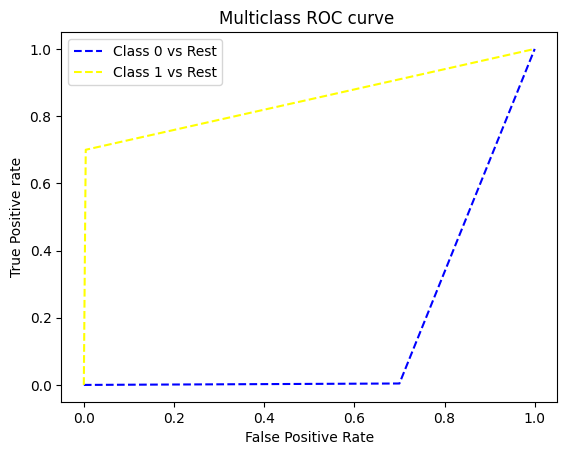

In [310]:
roc(y_test, y_prediction)

##Decision Tree Comparision

In [311]:
DTresult

{'DT1': 0.7017383348581885,
 'DT2': 0.1546203110704483,
 'DT3': 0.7493138151875571,
 'DT4': 0.6980786825251601,
 'DT5': 0.7392497712717292,
 'DT6': 0.6806953339432754,
 'DT7': 0.6999085086916743}

In [312]:
resultDic['Decision Tree'] = 0.7465690759377859#DT3, {'max_depth': 9, 'min_samples_split': 20}

#Random Forest with gridsearchCV

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
def RF(x_train, y_train):
  model = RandomForestClassifier()
  n_estimators= [ 10, 50, 100]
  max_depth = [3, 4, 5, 6, 7]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(n_estimators=n_estimators,min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [315]:
RFresult = {}

##Random Forest without resampling

In [316]:
grid_result = RF(x_train, y_train)

In [317]:
results(grid_result)

Best: 0.920595 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.874859 (0.012392) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.861757 (0.013979) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.873168 (0.017646) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.858612 (0.009460) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.873123 (0.010254) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.860960 (0.009872) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.845417 (0.002160) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.853119 (0.012213) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.869741 (0.009284) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.893736 (0.004047) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.893267 (0.010948) with: {'max_depth'

In [318]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF1'])

Analysis of the Algorithm:

[[4206   25]
 [ 368  725]]
[[4206   25]
 [ 368  725]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      4231
           1       0.97      0.66      0.79      1093

    accuracy                           0.93      5324
   macro avg       0.94      0.83      0.87      5324
weighted avg       0.93      0.93      0.92      5324

Accuracy: 0.92618332081142
Precision: 0.9292191292128955
Recall: 0.92618332081142
F1 Score: 0.9207520938524604
testing recall Score for class1: 0.6633119853613907


In [319]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6593137254901961


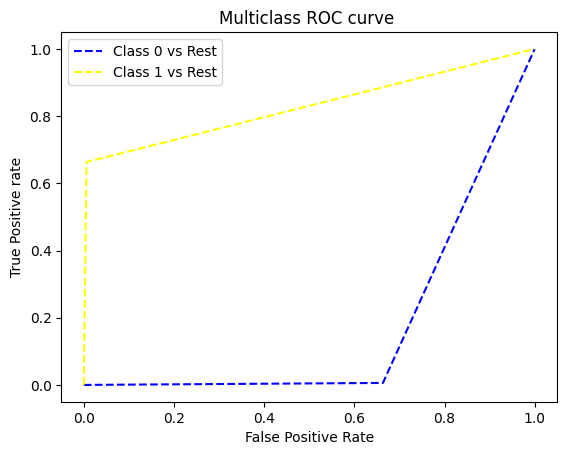

In [320]:
roc(y_test, y_prediction)

##Random Forest without resampling and pca

In [321]:
grid_result = RF(x_train_pca, y_train)

In [322]:
results(grid_result)

Best: 0.895567 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.827150 (0.004673) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.830907 (0.004323) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.830531 (0.001767) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.830344 (0.006532) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.830015 (0.003157) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.831001 (0.003087) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.829310 (0.009642) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.830578 (0.008208) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.830672 (0.004941) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.857344 (0.008225) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.858048 (0.005301) with: {'max_depth'

In [323]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", RFresult['RF2'])

Analysis of the Algorithm:

[[4141   90]
 [ 993  100]]
[[4141   90]
 [ 993  100]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4231
           1       0.53      0.09      0.16      1093

    accuracy                           0.80      5324
   macro avg       0.67      0.54      0.52      5324
weighted avg       0.75      0.80      0.73      5324

Accuracy: 0.7965815176558978
Precision: 0.7490454926172263
Recall: 0.7965815176558978
F1 Score: 0.7348036985762395
Class 1 recall score on test data: 0.09149130832570906


In [324]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5866755793226381


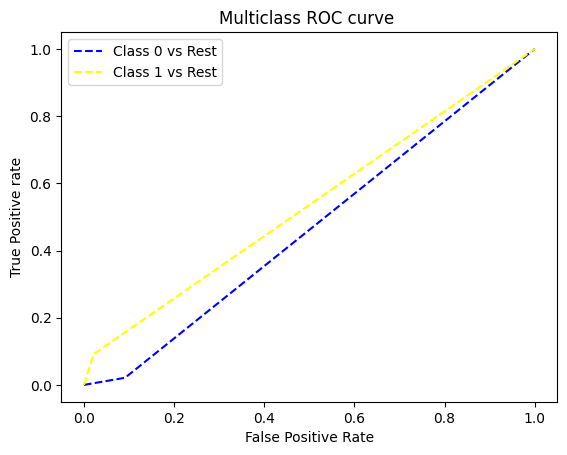

In [325]:
roc(y_test, y_prediction)

##Random Forest with undersampling

In [326]:
grid_result = RF(x_train_dres, y_train_dres)

In [327]:
results(grid_result)

Best: 0.904739 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.867554 (0.016368) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.856062 (0.019038) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.852072 (0.017642) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.859918 (0.024204) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.871273 (0.012696) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.869717 (0.012892) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.863564 (0.024056) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.867623 (0.013306) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.858561 (0.014981) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.884660 (0.006868) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.881143 (0.012268) with: {'max_depth'

In [328]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',RFresult['RF3'])

Analysis of the Algorithm:

[[3845  386]
 [ 294  799]]
[[3845  386]
 [ 294  799]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4231
           1       0.67      0.73      0.70      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.82      0.81      5324
weighted avg       0.88      0.87      0.87      5324

Accuracy: 0.8722764838467317
Precision: 0.8766778776624725
Recall: 0.8722764838467317
F1 Score: 0.8741536789579699
testing recall Score: 0.7310155535224153


In [329]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7413101604278075


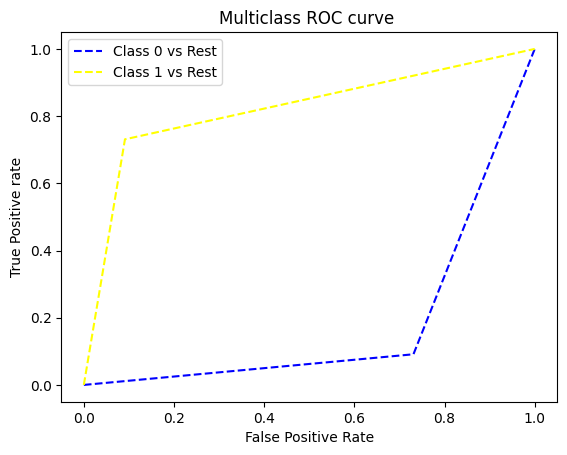

In [330]:
roc(y_test, y_prediction)

##Random Forest with undersampling and pca

In [331]:
grid_result = RF(x_train_downsampled_pca, y_train_dres)

In [332]:
results(grid_result)

Best: 0.896221 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.822392 (0.015347) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.814076 (0.006412) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.823541 (0.012122) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.817927 (0.018818) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.820363 (0.004508) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.822187 (0.016100) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.819415 (0.016131) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.818875 (0.006847) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.818065 (0.008517) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.846528 (0.014729) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.849435 (0.007245) with: {'max_depth':

In [333]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',RFresult['RF4'])

Analysis of the Algorithm:

[[3823  408]
 [ 320  773]]
[[3823  408]
 [ 320  773]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.65      0.71      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.79      0.81      0.80      5324
weighted avg       0.87      0.86      0.87      5324

Accuracy: 0.8632607062359129
Precision: 0.8676942801999102
Recall: 0.8632607062359129
F1 Score: 0.8651880200183371
testing class 1 recall Score: 0.707227813357731


In [334]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.732620320855615


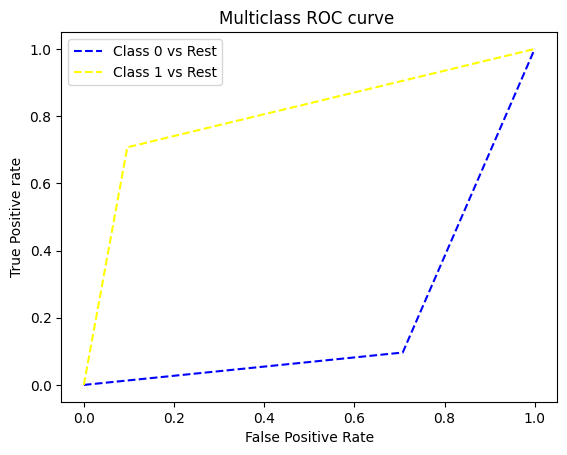

In [335]:
roc(y_test, y_prediction)

##Random Forest with upsampling

In [336]:
grid_result = RF(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [337]:
results(grid_result)

Best: 0.847156 using {'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 100}
0.806789 (0.009528) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.810626 (0.004760) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.811489 (0.007919) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.809525 (0.013481) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.809407 (0.006168) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.810924 (0.006622) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.795366 (0.019373) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.810924 (0.008744) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.812054 (0.008168) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.815475 (0.011658) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.816844 (0.009317) with: {'max_depth

In [338]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF5'])

Analysis of the Algorithm:

[[3938  293]
 [ 279  814]]
[[3938  293]
 [ 279  814]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.74      0.74      0.74      1093

    accuracy                           0.89      5324
   macro avg       0.83      0.84      0.84      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8925619834710744
Precision: 0.8930840081703944
Recall: 0.8925619834710744
F1 Score: 0.8928148087277737
Class 1 recall score for test data: 0.7447392497712717


In [339]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.767967634459781


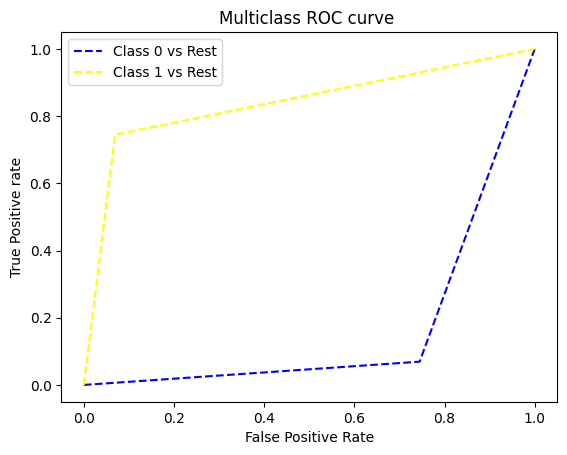

In [340]:
roc(y_test, y_prediction)

##Random Forest with upsampling and pca

In [341]:
grid_result = RF(X_train_upsampled_pca, y_train_ures_SMOTE)

In [342]:
results(grid_result)

Best: 0.831093 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.772371 (0.014457) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.783734 (0.009661) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.778498 (0.004914) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.775881 (0.012377) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.780462 (0.007322) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.780581 (0.003128) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.774394 (0.013741) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.773977 (0.010805) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.779421 (0.004535) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.791766 (0.007033) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.795960 (0.004772) with: {'max_depth'

In [343]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF6'])

Analysis of the Algorithm:

[[3763  468]
 [ 297  796]]
[[3763  468]
 [ 297  796]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4231
           1       0.63      0.73      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.78      0.81      0.79      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8563110443275732
Precision: 0.8658535270170451
Recall: 0.8563110443275732
F1 Score: 0.8600415744183009
Class 1 recall score for test data: 0.7282708142726441


In [344]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7756425511661114


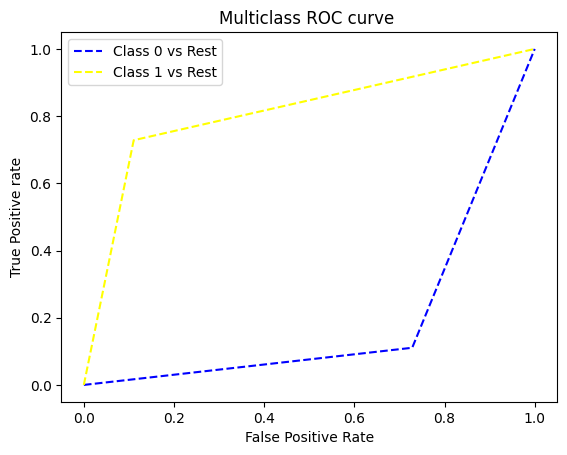

In [345]:
roc(y_test, y_prediction)

##Random Forest without resampling

In [346]:
grid_result = RF(featureSelectedTrain, y_train)

In [347]:
results(grid_result)

Best: 0.925291 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.873779 (0.011969) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.887725 (0.006313) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.890637 (0.015935) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.866314 (0.018566) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.888148 (0.010237) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.889979 (0.012053) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.887303 (0.014473) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.881949 (0.011594) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.888289 (0.012744) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.900451 (0.006833) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.902799 (0.009031) with: {'max_depth':

In [348]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
RFresult['RF7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF7'])

Analysis of the Algorithm:

[[4211   20]
 [ 340  753]]
[[4211   20]
 [ 340  753]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.97      0.69      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.84      0.88      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.932381667918858
Precision: 0.935316942688542
Recall: 0.932381667918858
F1 Score: 0.9278156843001859
testing recall Score for class1: 0.6889295516925892


In [349]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.678921568627451


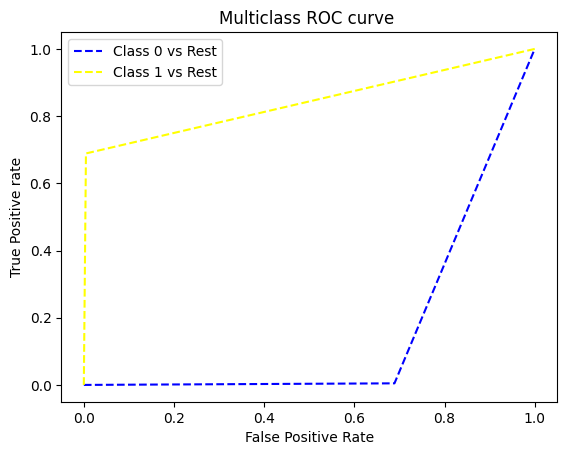

In [350]:
roc(y_test, y_prediction)

##Random Forest Comparision

In [351]:
RFresult

{'RF1': 0.6633119853613907,
 'RF2': 0.09149130832570906,
 'RF3': 0.7310155535224153,
 'RF4': 0.707227813357731,
 'RF5': 0.7447392497712717,
 'RF6': 0.7282708142726441,
 'RF7': 0.6889295516925892}

In [352]:
resultDic['Random Forest'] = 0.7319304666056725 #'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50

# DNN Model 


In [353]:
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.metrics import AUC
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
def FCNN(X_train, y_train, X_test):
    batch_size = 256
    epochs = 30
    np.random.seed(5)        

    model = Sequential()

    model.add(Dense(input_shape= (X_train.shape[1],), units = 150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 75, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.build()
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(thresholds=0.5)])
    model.summary()

    early_stops = EarlyStopping(patience=10, monitor='val_acc')
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit(X_train, y_train, callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)

    pred = model.predict(X_test)
  
    return pred

In [354]:
def print_analysis(y_test, results):
  print('ROC_AUC of the test set:', roc_auc_score(y_test, results))
  results_class = (np.array(results) > 0.1).astype(int)
  cm = confusion_matrix(y_test, results_class)
  print('\nConfusion_metrix : \n', cm)
  tn = cm[0][0]
  fp = cm[0][1]    
  fn = cm[1][0]
  tp = cm[1][1]
  precision = tp / (tp + fp)
  print( 'Precision : ', precision )
  recall = tp / (tp + fn)
  print( 'Recall : ', recall )
  print( 'F1-score :', 2*precision*recall/(precision+recall))

DNN without resampling

In [355]:
results1 = FCNN(x_train, y_train, x_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               4650      
                                                                 
 batch_normalization (BatchN  (None, 150)              600       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_1 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 75)                0

84/84 [==============================] - 3s 8ms/step - loss: 0.5420 - recall: 0.7571
Epoch 2/30
82/84 [============================>.] - ETA: 0s - loss: 0.3660 - recall: 0.6823

84/84 [==============================] - 1s 8ms/step - loss: 0.3652 - recall: 0.6825
Epoch 3/30
82/84 [============================>.] - ETA: 0s - loss: 0.3044 - recall: 0.6425

84/84 [==============================] - 1s 8ms/step - loss: 0.3037 - recall: 0.6444
Epoch 4/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2835 - recall: 0.6308

84/84 [==============================] - 1s 7ms/step - loss: 0.2827 - recall: 0.6328
Epoch 5/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2665 - recall: 0.6420

84/84 [==============================] - 1s 7ms/step - loss: 0.2689 - recall: 0.6370
Epoch 6/30
82/84 [============================>.] - ETA: 0s - loss: 0.2639 - recall: 0.6323

84/84 [==============================] - 1s 8ms/step - loss: 0.2635 - recall: 0.6328
Epoch 7/30
82/84 [============================>.] - ETA: 0s - loss: 0.2604 - recall: 0.6453

84/84 [==============================] - 1s 12ms/step - loss: 0.2599 - recall: 0.6457
Epoch 8/30
84/84 [==============================] - ETA: 0s - loss: 0.2559 - recall: 0.6397

84/84 [==============================] - 1s 11ms/step - loss: 0.2559 - recall: 0.6397
Epoch 9/30
83/84 [============================>.] - ETA: 0s - loss: 0.2531 - recall: 0.6443

84/84 [==============================] - 1s 9ms/step - loss: 0.2534 - recall: 0.6442
Epoch 10/30
84/84 [==============================] - ETA: 0s - loss: 0.2512 - recall: 0.6459

84/84 [==============================] - 1s 9ms/step - loss: 0.2512 - recall: 0.6459
Epoch 11/30
82/84 [============================>.] - ETA: 0s - loss: 0.2509 - recall: 0.6603

84/84 [==============================] - 1s 9ms/step - loss: 0.2507 - recall: 0.6604
Epoch 12/30
83/84 [============================>.] - ETA: 0s - loss: 0.2469 - recall: 0.6484

84/84 [==============================] - 1s 8ms/step - loss: 0.2472 - recall: 0.6482
Epoch 13/30
82/84 [============================>.] - ETA: 0s - loss: 0.2475 - recall: 0.6523

84/84 [==============================] - 1s 7ms/step - loss: 0.2471 - recall: 0.6529
Epoch 14/30
83/84 [============================>.] - ETA: 0s - loss: 0.2438 - recall: 0.6472

84/84 [==============================] - 1s 7ms/step - loss: 0.2439 - recall: 0.6473
Epoch 15/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2400 - recall: 0.6649

84/84 [==============================] - 1s 7ms/step - loss: 0.2413 - recall: 0.6624
Epoch 16/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2402 - recall: 0.6532

84/84 [==============================] - 1s 7ms/step - loss: 0.2392 - recall: 0.6551
Epoch 17/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2367 - recall: 0.6590

84/84 [==============================] - 1s 8ms/step - loss: 0.2359 - recall: 0.6598
Epoch 18/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2360 - recall: 0.6648

84/84 [==============================] - 1s 9ms/step - loss: 0.2369 - recall: 0.6642
Epoch 19/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2371 - recall: 0.6660

84/84 [==============================] - 1s 7ms/step - loss: 0.2368 - recall: 0.6676
Epoch 20/30
82/84 [============================>.] - ETA: 0s - loss: 0.2334 - recall: 0.6706

84/84 [==============================] - 1s 7ms/step - loss: 0.2343 - recall: 0.6698
Epoch 21/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2350 - recall: 0.6661

84/84 [==============================] - 1s 8ms/step - loss: 0.2348 - recall: 0.6671
Epoch 22/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2325 - recall: 0.6695

84/84 [==============================] - 1s 8ms/step - loss: 0.2325 - recall: 0.6698
Epoch 23/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2309 - recall: 0.6652

84/84 [==============================] - 1s 8ms/step - loss: 0.2314 - recall: 0.6640
Epoch 24/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2323 - recall: 0.6680

84/84 [==============================] - 1s 10ms/step - loss: 0.2324 - recall: 0.6682
Epoch 25/30
82/84 [============================>.] - ETA: 0s - loss: 0.2313 - recall: 0.6718

84/84 [==============================] - 1s 10ms/step - loss: 0.2313 - recall: 0.6716
Epoch 26/30
83/84 [============================>.] - ETA: 0s - loss: 0.2308 - recall: 0.6673

84/84 [==============================] - 1s 12ms/step - loss: 0.2311 - recall: 0.6671
Epoch 27/30
83/84 [============================>.] - ETA: 0s - loss: 0.2287 - recall: 0.6698

84/84 [==============================] - 1s 8ms/step - loss: 0.2288 - recall: 0.6698
Epoch 28/30
82/84 [============================>.] - ETA: 0s - loss: 0.2284 - recall: 0.6646

84/84 [==============================] - 1s 8ms/step - loss: 0.2284 - recall: 0.6649
Epoch 29/30
83/84 [============================>.] - ETA: 0s - loss: 0.2272 - recall: 0.6790

84/84 [==============================] - 1s 9ms/step - loss: 0.2275 - recall: 0.6787
Epoch 30/30
84/84 [==============================] - ETA: 0s - loss: 0.2264 - recall: 0.6783

167/167 [==============================] - 0s 2ms/step


In [356]:
print_analysis(y_test, results1)

ROC_AUC of the test set: 0.9162025246930307

Confusion_metrix : 
 [[2844 1387]
 [ 119  974]]
Precision :  0.4125370605675561
Recall :  0.8911253430924062
F1-score : 0.5639837869137231


DNN without resampling and pca

In [357]:
results2 = FCNN(x_train_pca, y_train, x_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_3 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_4 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 75)               

84/84 [==============================] - 3s 8ms/step - loss: 0.5561 - recall_1: 0.7787
Epoch 2/30
79/84 [===========================>..] - ETA: 0s - loss: 0.3859 - recall_1: 0.7007

84/84 [==============================] - 1s 7ms/step - loss: 0.3842 - recall_1: 0.6970
Epoch 3/30
79/84 [===========================>..] - ETA: 0s - loss: 0.3082 - recall_1: 0.6430

84/84 [==============================] - 1s 7ms/step - loss: 0.3056 - recall_1: 0.6446
Epoch 4/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2810 - recall_1: 0.6424

84/84 [==============================] - 1s 7ms/step - loss: 0.2817 - recall_1: 0.6384
Epoch 5/30
83/84 [============================>.] - ETA: 0s - loss: 0.2714 - recall_1: 0.6277

84/84 [==============================] - 1s 7ms/step - loss: 0.2714 - recall_1: 0.6281
Epoch 6/30
83/84 [============================>.] - ETA: 0s - loss: 0.2670 - recall_1: 0.6364

84/84 [==============================] - 1s 7ms/step - loss: 0.2671 - recall_1: 0.6361
Epoch 7/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2601 - recall_1: 0.6381

84/84 [==============================] - 1s 10ms/step - loss: 0.2612 - recall_1: 0.6370
Epoch 8/30
83/84 [============================>.] - ETA: 0s - loss: 0.2571 - recall_1: 0.6379

84/84 [==============================] - 1s 11ms/step - loss: 0.2570 - recall_1: 0.6379
Epoch 9/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2556 - recall_1: 0.6357

84/84 [==============================] - 1s 11ms/step - loss: 0.2562 - recall_1: 0.6357
Epoch 10/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2512 - recall_1: 0.6548

84/84 [==============================] - 1s 8ms/step - loss: 0.2517 - recall_1: 0.6533
Epoch 11/30
84/84 [==============================] - ETA: 0s - loss: 0.2488 - recall_1: 0.6511

84/84 [==============================] - 1s 7ms/step - loss: 0.2488 - recall_1: 0.6511
Epoch 12/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2474 - recall_1: 0.6553

84/84 [==============================] - 1s 7ms/step - loss: 0.2470 - recall_1: 0.6566
Epoch 13/30
84/84 [==============================] - ETA: 0s - loss: 0.2464 - recall_1: 0.6549

84/84 [==============================] - 1s 8ms/step - loss: 0.2464 - recall_1: 0.6549
Epoch 14/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2413 - recall_1: 0.6611

84/84 [==============================] - 1s 8ms/step - loss: 0.2422 - recall_1: 0.6593
Epoch 15/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2461 - recall_1: 0.6537

84/84 [==============================] - 1s 8ms/step - loss: 0.2448 - recall_1: 0.6551
Epoch 16/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2405 - recall_1: 0.6603

84/84 [==============================] - 1s 8ms/step - loss: 0.2411 - recall_1: 0.6598
Epoch 17/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2401 - recall_1: 0.6606

84/84 [==============================] - 1s 7ms/step - loss: 0.2407 - recall_1: 0.6595
Epoch 18/30
78/84 [==========================>...] - ETA: 0s - loss: 0.2338 - recall_1: 0.6700

84/84 [==============================] - 1s 7ms/step - loss: 0.2365 - recall_1: 0.6667
Epoch 19/30
83/84 [============================>.] - ETA: 0s - loss: 0.2385 - recall_1: 0.6620

84/84 [==============================] - 1s 7ms/step - loss: 0.2385 - recall_1: 0.6624
Epoch 20/30
77/84 [==========================>...] - ETA: 0s - loss: 0.2341 - recall_1: 0.6714

84/84 [==============================] - 1s 7ms/step - loss: 0.2342 - recall_1: 0.6705
Epoch 21/30
83/84 [============================>.] - ETA: 0s - loss: 0.2352 - recall_1: 0.6685

84/84 [==============================] - 1s 7ms/step - loss: 0.2351 - recall_1: 0.6687
Epoch 22/30
81/84 [===========================>..] - ETA: 0s - loss: 0.2341 - recall_1: 0.6636

84/84 [==============================] - 1s 7ms/step - loss: 0.2343 - recall_1: 0.6640
Epoch 23/30
84/84 [==============================] - ETA: 0s - loss: 0.2299 - recall_1: 0.6705

84/84 [==============================] - 1s 7ms/step - loss: 0.2299 - recall_1: 0.6705
Epoch 24/30
83/84 [============================>.] - ETA: 0s - loss: 0.2309 - recall_1: 0.6655

84/84 [==============================] - 1s 7ms/step - loss: 0.2309 - recall_1: 0.6658
Epoch 25/30
82/84 [============================>.] - ETA: 0s - loss: 0.2324 - recall_1: 0.6671

84/84 [==============================] - 1s 9ms/step - loss: 0.2327 - recall_1: 0.6671
Epoch 26/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2332 - recall_1: 0.6701

84/84 [==============================] - 1s 11ms/step - loss: 0.2318 - recall_1: 0.6720
Epoch 27/30
80/84 [===========================>..] - ETA: 0s - loss: 0.2280 - recall_1: 0.6730

84/84 [==============================] - 1s 11ms/step - loss: 0.2281 - recall_1: 0.6734
Epoch 28/30
82/84 [============================>.] - ETA: 0s - loss: 0.2296 - recall_1: 0.6709

84/84 [==============================] - 1s 10ms/step - loss: 0.2305 - recall_1: 0.6693
Epoch 29/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2296 - recall_1: 0.6692

84/84 [==============================] - 1s 7ms/step - loss: 0.2297 - recall_1: 0.6684
Epoch 30/30
79/84 [===========================>..] - ETA: 0s - loss: 0.2285 - recall_1: 0.6753

167/167 [==============================] - 0s 2ms/step


In [358]:
print_analysis(y_test, results2)

ROC_AUC of the test set: 0.638478398558282

Confusion_metrix : 
 [[2191 2040]
 [ 397  696]]
Precision :  0.2543859649122807
Recall :  0.636779505946935
F1-score : 0.36354139462000523


CNN with undersampling

In [359]:
results3 = FCNN(x_train_dres, y_train_dres, x_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 150)               4650      
                                                                 
 batch_normalization_6 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_7 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 75)               

58/58 [==============================] - 3s 8ms/step - loss: 0.5366 - recall_2: 0.8400
Epoch 2/30
55/58 [===========================>..] - ETA: 0s - loss: 0.3441 - recall_2: 0.8213

58/58 [==============================] - 0s 8ms/step - loss: 0.3435 - recall_2: 0.8184
Epoch 3/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2781 - recall_2: 0.7907

58/58 [==============================] - 0s 8ms/step - loss: 0.2775 - recall_2: 0.7879
Epoch 4/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2556 - recall_2: 0.7749

58/58 [==============================] - 0s 8ms/step - loss: 0.2560 - recall_2: 0.7747
Epoch 5/30
58/58 [==============================] - ETA: 0s - loss: 0.2413 - recall_2: 0.7758

58/58 [==============================] - 1s 9ms/step - loss: 0.2413 - recall_2: 0.7758
Epoch 6/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2325 - recall_2: 0.7832

58/58 [==============================] - 0s 8ms/step - loss: 0.2321 - recall_2: 0.7825
Epoch 7/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2332 - recall_2: 0.7737

58/58 [==============================] - 0s 8ms/step - loss: 0.2300 - recall_2: 0.7763
Epoch 8/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2275 - recall_2: 0.7840

58/58 [==============================] - 0s 7ms/step - loss: 0.2273 - recall_2: 0.7832
Epoch 9/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2242 - recall_2: 0.7834

58/58 [==============================] - 0s 7ms/step - loss: 0.2234 - recall_2: 0.7841
Epoch 10/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2196 - recall_2: 0.7831

58/58 [==============================] - 0s 7ms/step - loss: 0.2195 - recall_2: 0.7839
Epoch 11/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2186 - recall_2: 0.7852

58/58 [==============================] - 0s 8ms/step - loss: 0.2181 - recall_2: 0.7874
Epoch 12/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2188 - recall_2: 0.7872

58/58 [==============================] - 1s 11ms/step - loss: 0.2178 - recall_2: 0.7877
Epoch 13/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2137 - recall_2: 0.7931

58/58 [==============================] - 1s 11ms/step - loss: 0.2143 - recall_2: 0.7928
Epoch 14/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2128 - recall_2: 0.7864

58/58 [==============================] - 1s 10ms/step - loss: 0.2132 - recall_2: 0.7874
Epoch 15/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2073 - recall_2: 0.7937

58/58 [==============================] - 1s 10ms/step - loss: 0.2068 - recall_2: 0.7941
Epoch 16/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2078 - recall_2: 0.7903

58/58 [==============================] - 0s 8ms/step - loss: 0.2086 - recall_2: 0.7885
Epoch 17/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2107 - recall_2: 0.7888

58/58 [==============================] - 0s 7ms/step - loss: 0.2117 - recall_2: 0.7881
Epoch 18/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2048 - recall_2: 0.8004

58/58 [==============================] - 1s 9ms/step - loss: 0.2047 - recall_2: 0.8012
Epoch 19/30
58/58 [==============================] - ETA: 0s - loss: 0.2071 - recall_2: 0.7932

58/58 [==============================] - 1s 9ms/step - loss: 0.2071 - recall_2: 0.7932
Epoch 20/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2052 - recall_2: 0.7991

58/58 [==============================] - 0s 9ms/step - loss: 0.2043 - recall_2: 0.8004
Epoch 21/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2005 - recall_2: 0.8024

58/58 [==============================] - 0s 8ms/step - loss: 0.2008 - recall_2: 0.8028
Epoch 22/30
51/58 [=========================>....] - ETA: 0s - loss: 0.2017 - recall_2: 0.8020

58/58 [==============================] - 0s 7ms/step - loss: 0.2007 - recall_2: 0.8030
Epoch 23/30
53/58 [==========================>...] - ETA: 0s - loss: 0.1971 - recall_2: 0.8034

58/58 [==============================] - 0s 7ms/step - loss: 0.1971 - recall_2: 0.8035
Epoch 24/30
52/58 [=========================>....] - ETA: 0s - loss: 0.1932 - recall_2: 0.8044

58/58 [==============================] - 0s 8ms/step - loss: 0.1943 - recall_2: 0.8044
Epoch 25/30
55/58 [===========================>..] - ETA: 0s - loss: 0.1981 - recall_2: 0.8054

58/58 [==============================] - 0s 8ms/step - loss: 0.1987 - recall_2: 0.8048
Epoch 26/30
53/58 [==========================>...] - ETA: 0s - loss: 0.1959 - recall_2: 0.8137

58/58 [==============================] - 0s 7ms/step - loss: 0.1974 - recall_2: 0.8108
Epoch 27/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1999 - recall_2: 0.8027

58/58 [==============================] - 0s 7ms/step - loss: 0.1981 - recall_2: 0.8026
Epoch 28/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1936 - recall_2: 0.8131

58/58 [==============================] - 0s 7ms/step - loss: 0.1948 - recall_2: 0.8122
Epoch 29/30
53/58 [==========================>...] - ETA: 0s - loss: 0.1934 - recall_2: 0.8076

58/58 [==============================] - 0s 7ms/step - loss: 0.1931 - recall_2: 0.8061
Epoch 30/30
56/58 [===========================>..] - ETA: 0s - loss: 0.1937 - recall_2: 0.8078

167/167 [==============================] - 0s 2ms/step


In [360]:
print_analysis(y_test, results3)

ROC_AUC of the test set: 0.9075369073688887

Confusion_metrix : 
 [[2401 1830]
 [  85 1008]]
Precision :  0.35517970401691334
Recall :  0.9222323879231473
F1-score : 0.5128466039175783


DNN with downsampling and pca

In [361]:
results4 = FCNN(x_train_downsampled_pca, y_train_dres, x_test_downsampled_transformed_pca)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 150)               2850      
                                                                 
 batch_normalization_9 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_13 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_10 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 75)               

58/58 [==============================] - 3s 12ms/step - loss: 0.5191 - recall_3: 0.7995
Epoch 2/30
54/58 [==========================>...] - ETA: 0s - loss: 0.3336 - recall_3: 0.8009

58/58 [==============================] - 1s 13ms/step - loss: 0.3303 - recall_3: 0.7999
Epoch 3/30
58/58 [==============================] - ETA: 0s - loss: 0.2724 - recall_3: 0.7803

58/58 [==============================] - 1s 9ms/step - loss: 0.2724 - recall_3: 0.7803
Epoch 4/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2498 - recall_3: 0.7759

58/58 [==============================] - 0s 7ms/step - loss: 0.2499 - recall_3: 0.7756
Epoch 5/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2391 - recall_3: 0.7780

58/58 [==============================] - 0s 7ms/step - loss: 0.2403 - recall_3: 0.7752
Epoch 6/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2358 - recall_3: 0.7736

58/58 [==============================] - 0s 7ms/step - loss: 0.2349 - recall_3: 0.7741
Epoch 7/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2337 - recall_3: 0.7716

58/58 [==============================] - 0s 7ms/step - loss: 0.2333 - recall_3: 0.7718
Epoch 8/30
57/58 [============================>.] - ETA: 0s - loss: 0.2266 - recall_3: 0.7814

58/58 [==============================] - 0s 8ms/step - loss: 0.2262 - recall_3: 0.7821
Epoch 9/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2240 - recall_3: 0.7833

58/58 [==============================] - 0s 7ms/step - loss: 0.2233 - recall_3: 0.7828
Epoch 10/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2193 - recall_3: 0.7787

58/58 [==============================] - 1s 9ms/step - loss: 0.2201 - recall_3: 0.7774
Epoch 11/30
57/58 [============================>.] - ETA: 0s - loss: 0.2177 - recall_3: 0.7851

58/58 [==============================] - 1s 9ms/step - loss: 0.2179 - recall_3: 0.7848
Epoch 12/30
57/58 [============================>.] - ETA: 0s - loss: 0.2159 - recall_3: 0.7849

58/58 [==============================] - 1s 10ms/step - loss: 0.2168 - recall_3: 0.7834
Epoch 13/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2146 - recall_3: 0.7787

58/58 [==============================] - 1s 9ms/step - loss: 0.2147 - recall_3: 0.7796
Epoch 14/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2121 - recall_3: 0.7877

58/58 [==============================] - 0s 7ms/step - loss: 0.2107 - recall_3: 0.7892
Epoch 15/30
53/58 [==========================>...] - ETA: 0s - loss: 0.2140 - recall_3: 0.7866

58/58 [==============================] - 0s 7ms/step - loss: 0.2142 - recall_3: 0.7852
Epoch 16/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2087 - recall_3: 0.7930

58/58 [==============================] - 0s 7ms/step - loss: 0.2083 - recall_3: 0.7937
Epoch 17/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2091 - recall_3: 0.7907

58/58 [==============================] - 0s 7ms/step - loss: 0.2086 - recall_3: 0.7926
Epoch 18/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2079 - recall_3: 0.7942

58/58 [==============================] - 0s 8ms/step - loss: 0.2067 - recall_3: 0.7952
Epoch 19/30
55/58 [===========================>..] - ETA: 0s - loss: 0.2078 - recall_3: 0.7947

58/58 [==============================] - 1s 9ms/step - loss: 0.2083 - recall_3: 0.7939
Epoch 20/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2031 - recall_3: 0.7918

58/58 [==============================] - 0s 8ms/step - loss: 0.2028 - recall_3: 0.7930
Epoch 21/30
52/58 [=========================>....] - ETA: 0s - loss: 0.2018 - recall_3: 0.8004

58/58 [==============================] - 0s 7ms/step - loss: 0.2023 - recall_3: 0.7988
Epoch 22/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2043 - recall_3: 0.7979

58/58 [==============================] - 0s 7ms/step - loss: 0.2059 - recall_3: 0.7975
Epoch 23/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2049 - recall_3: 0.8027

58/58 [==============================] - 0s 7ms/step - loss: 0.2058 - recall_3: 0.8019
Epoch 24/30
58/58 [==============================] - ETA: 0s - loss: 0.1986 - recall_3: 0.8008

58/58 [==============================] - 0s 8ms/step - loss: 0.1986 - recall_3: 0.8008
Epoch 25/30
54/58 [==========================>...] - ETA: 0s - loss: 0.2006 - recall_3: 0.8082

58/58 [==============================] - 1s 13ms/step - loss: 0.2006 - recall_3: 0.8084
Epoch 26/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1942 - recall_3: 0.8030

58/58 [==============================] - 1s 12ms/step - loss: 0.1952 - recall_3: 0.8030
Epoch 27/30
56/58 [===========================>..] - ETA: 0s - loss: 0.2002 - recall_3: 0.7979

58/58 [==============================] - 1s 10ms/step - loss: 0.2007 - recall_3: 0.7975
Epoch 28/30
56/58 [===========================>..] - ETA: 0s - loss: 0.1975 - recall_3: 0.8021

58/58 [==============================] - 1s 11ms/step - loss: 0.1974 - recall_3: 0.8019
Epoch 29/30
54/58 [==========================>...] - ETA: 0s - loss: 0.1981 - recall_3: 0.8025

58/58 [==============================] - 1s 9ms/step - loss: 0.1970 - recall_3: 0.8019
Epoch 30/30
52/58 [=========================>....] - ETA: 0s - loss: 0.1928 - recall_3: 0.8063

167/167 [==============================] - 0s 2ms/step


In [362]:
print_analysis(y_test, results4)

ROC_AUC of the test set: 0.9048619056443716

Confusion_metrix : 
 [[2369 1862]
 [  88 1005]]
Precision :  0.3505406348099058
Recall :  0.9194876486733761
F1-score : 0.5075757575757576


DNN with upsampling

In [363]:
results5 = FCNN(x_train_ures_SMOTE, y_train_ures_SMOTE, x_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 150)               4650      
                                                                 
 batch_normalization_12 (Bat  (None, 150)              600       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 150)               0         
                                                                 
 dense_17 (Dense)            (None, 75)                11325     
                                                                 
 batch_normalization_13 (Bat  (None, 75)               300       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 75)               

132/132 [==============================] - 3s 8ms/step - loss: 0.4705 - recall_4: 0.7934
Epoch 2/30
132/132 [==============================] - ETA: 0s - loss: 0.3733 - recall_4: 0.7877

132/132 [==============================] - 2s 12ms/step - loss: 0.3733 - recall_4: 0.7877
Epoch 3/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3523 - recall_4: 0.7861

132/132 [==============================] - 1s 9ms/step - loss: 0.3520 - recall_4: 0.7862
Epoch 4/30
128/132 [============================>.] - ETA: 0s - loss: 0.3445 - recall_4: 0.7830

132/132 [==============================] - 1s 9ms/step - loss: 0.3442 - recall_4: 0.7842
Epoch 5/30
131/132 [============================>.] - ETA: 0s - loss: 0.3376 - recall_4: 0.7831

132/132 [==============================] - 1s 9ms/step - loss: 0.3376 - recall_4: 0.7832
Epoch 6/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3309 - recall_4: 0.7886

132/132 [==============================] - 1s 8ms/step - loss: 0.3311 - recall_4: 0.7884
Epoch 7/30
130/132 [============================>.] - ETA: 0s - loss: 0.3269 - recall_4: 0.7914

132/132 [==============================] - 1s 8ms/step - loss: 0.3271 - recall_4: 0.7915
Epoch 8/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3225 - recall_4: 0.7934

132/132 [==============================] - 1s 8ms/step - loss: 0.3224 - recall_4: 0.7925
Epoch 9/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3179 - recall_4: 0.7968

132/132 [==============================] - 1s 8ms/step - loss: 0.3181 - recall_4: 0.7972
Epoch 10/30
131/132 [============================>.] - ETA: 0s - loss: 0.3159 - recall_4: 0.7930

132/132 [==============================] - 1s 8ms/step - loss: 0.3160 - recall_4: 0.7929
Epoch 11/30
128/132 [============================>.] - ETA: 0s - loss: 0.3146 - recall_4: 0.7952

132/132 [==============================] - 1s 9ms/step - loss: 0.3152 - recall_4: 0.7944
Epoch 12/30
127/132 [===========================>..] - ETA: 0s - loss: 0.3120 - recall_4: 0.7951

132/132 [==============================] - 1s 9ms/step - loss: 0.3115 - recall_4: 0.7951
Epoch 13/30
131/132 [============================>.] - ETA: 0s - loss: 0.3096 - recall_4: 0.8000

132/132 [==============================] - 2s 11ms/step - loss: 0.3095 - recall_4: 0.8002
Epoch 14/30
127/132 [===========================>..] - ETA: 0s - loss: 0.3081 - recall_4: 0.7984

132/132 [==============================] - 1s 8ms/step - loss: 0.3077 - recall_4: 0.7983
Epoch 15/30
126/132 [===========================>..] - ETA: 0s - loss: 0.3062 - recall_4: 0.8013

132/132 [==============================] - 1s 8ms/step - loss: 0.3048 - recall_4: 0.8023
Epoch 16/30
131/132 [============================>.] - ETA: 0s - loss: 0.3041 - recall_4: 0.8027

132/132 [==============================] - 1s 7ms/step - loss: 0.3042 - recall_4: 0.8027
Epoch 17/30
132/132 [==============================] - ETA: 0s - loss: 0.3025 - recall_4: 0.8030

132/132 [==============================] - 1s 8ms/step - loss: 0.3025 - recall_4: 0.8030
Epoch 18/30
129/132 [============================>.] - ETA: 0s - loss: 0.2996 - recall_4: 0.8054

132/132 [==============================] - 1s 8ms/step - loss: 0.2995 - recall_4: 0.8054
Epoch 19/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2987 - recall_4: 0.8070

132/132 [==============================] - 1s 7ms/step - loss: 0.2988 - recall_4: 0.8068
Epoch 20/30
128/132 [============================>.] - ETA: 0s - loss: 0.2956 - recall_4: 0.8101

132/132 [==============================] - 1s 7ms/step - loss: 0.2957 - recall_4: 0.8097
Epoch 21/30
131/132 [============================>.] - ETA: 0s - loss: 0.2968 - recall_4: 0.8055

132/132 [==============================] - 1s 7ms/step - loss: 0.2968 - recall_4: 0.8056
Epoch 22/30
127/132 [===========================>..] - ETA: 0s - loss: 0.2951 - recall_4: 0.8098

132/132 [==============================] - 1s 8ms/step - loss: 0.2950 - recall_4: 0.8099
Epoch 23/30
129/132 [============================>.] - ETA: 0s - loss: 0.2924 - recall_4: 0.8099

132/132 [==============================] - 1s 10ms/step - loss: 0.2921 - recall_4: 0.8103
Epoch 24/30
131/132 [============================>.] - ETA: 0s - loss: 0.2902 - recall_4: 0.8141

132/132 [==============================] - 2s 12ms/step - loss: 0.2903 - recall_4: 0.8141
Epoch 25/30
128/132 [============================>.] - ETA: 0s - loss: 0.2896 - recall_4: 0.8150

132/132 [==============================] - 1s 9ms/step - loss: 0.2898 - recall_4: 0.8146
Epoch 26/30
128/132 [============================>.] - ETA: 0s - loss: 0.2872 - recall_4: 0.8196

132/132 [==============================] - 1s 8ms/step - loss: 0.2868 - recall_4: 0.8198
Epoch 27/30
128/132 [============================>.] - ETA: 0s - loss: 0.2860 - recall_4: 0.8178

132/132 [==============================] - 1s 8ms/step - loss: 0.2863 - recall_4: 0.8178
Epoch 28/30
131/132 [============================>.] - ETA: 0s - loss: 0.2838 - recall_4: 0.8161

132/132 [==============================] - 1s 9ms/step - loss: 0.2838 - recall_4: 0.8162
Epoch 29/30
126/132 [===========================>..] - ETA: 0s - loss: 0.2830 - recall_4: 0.8222

132/132 [==============================] - 1s 9ms/step - loss: 0.2832 - recall_4: 0.8208
Epoch 30/30
129/132 [============================>.] - ETA: 0s - loss: 0.2843 - recall_4: 0.8213

167/167 [==============================] - 0s 2ms/step


In [364]:
print_analysis(y_test, results5)

ROC_AUC of the test set: 0.9091299503101212

Confusion_metrix : 
 [[1922 2309]
 [  46 1047]]
Precision :  0.31197854588796187
Recall :  0.9579139981701739
F1-score : 0.47066756574511126


In [365]:
resultDic['DNN'] = 0.9542543458371455

In [366]:
resultDic

{'LogisticRegression': 0.7685269899359561,
 'Decision Tree': 0.7465690759377859,
 'Random Forest': 0.7319304666056725,
 'DNN': 0.9542543458371455}